In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
df = pd.read_csv('bitcoin-data.csv')

# Check the first few rows of the DataFrame
df.head()

,Timestamp,Price,A-SOPR,Mean Hash Rate,MVRV,Investor Capitalisation,Mean Transfer Volume Change Adjusted,Net realised profit and loss,Net Unrealised Profit And Loss,network value to transactions ratio nvt,Num of New Adresses,Percent UTXOs in Profit,Puell Multiple,Realised profit loss ratio,Seller Exhaustion constant,Stock to flow ratio deflection,Bitcoin Velocity
0,2012-12-31T00:00:00.000Z,13.512005,1.032137,2.312200e+13,1.804387,40476229.27,38.570127,222998.412600,0.445713,9.203338,18751,0.876986,0.924982,9.456063,0.017761,1.058733,0.108656
1,2013-01-01T00:00:00.000Z,13.220000,0.995874,2.351004e+13,1.765580,40444738.05,44.134893,-31505.770320,0.433613,7.582447,20051,0.774129,0.930871,0.573827,0.013337,1.028166,0.131884
2,2013-01-02T00:00:00.000Z,13.034000,0.999184,2.245758e+13,1.740427,40437332.88,45.949644,-7477.493284,0.427886,5.886555,24208,0.750145,0.876133,0.869100,0.009601,1.005881,0.169879
3,2013-01-03T00:00:00.000Z,13.190000,1.001195,2.370005e+13,1.760502,40448581.02,37.531246,11268.068350,0.428949,6.719452,30278,0.751308,0.927063,1.209115,0.007819,1.013022,0.148822
4,2013-01-04T00:00:00.000Z,13.174000,1.008728,2.217074e+13,1.756426,40514798.58,46.097640,66234.807940,0.431352,4.761873,25733,0.768224,0.877796,2.903723,0.008100,1.004086,0.210001


In [3]:
# Convert 'Timestamp' column to DateTime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [1]:
# Compute pairwise correlation of columns
correlation_matrix = df.corr()

# Use seaborn to visualize the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

NameError: name 'df' is not defined

In [5]:
# Let's assume 'A-SOPR', 'MVRV', and 'Bitcoin Velocity' have high correlation
X = df[['Percent UTXOs in Profit', 'Num of New Adresses', 'network value to transactions ratio nvt', 'Net realised profit and loss', 'Investor Capitalisation', 'Mean Hash Rate']]
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict the test set results
y_pred = model.predict(X_test)

# Calculate and print the metrics
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Coefficient of Determination (R^2):', r2_score(y_test, y_pred))

Mean Squared Error: 21135851.9724557
Coefficient of Determination (R^2): 0.914548969460916


In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load the data
df = pd.read_csv('bitcoin-data.csv')

# Convert 'Timestamp' column to DateTime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Sort data by timestamp
df = df.sort_values('Timestamp')

# Create a new binary column 'Price Direction' which indicates if the price has increased or decreased compared to the previous day
df['Price Direction'] = (df['Price'].diff() > 0).astype(int)

# Remove the first row (since it has no previous day to compare with)
df = df.iloc[1:]

# Define predictors X and outcome y
X = df[['Percent UTXOs in Profit', 'Num of New Adresses', 'network value to transactions ratio nvt', 'Net realised profit and loss', 'Investor Capitalisation', 'Mean Hash Rate']]
y = df['Price Direction']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict the test set results
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.58      0.57       346
           1       0.64      0.62      0.63       410

    accuracy                           0.60       756
   macro avg       0.60      0.60      0.60       756
weighted avg       0.60      0.60      0.60       756

[[201 145]
 [157 253]]


In [9]:
import numpy as np

# Replace infinities with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN with 0 or column mean
X.fillna(0, inplace=True)


In [12]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load the data
df = pd.read_csv('bitcoin-data.csv')

# Convert 'Timestamp' column to DateTime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Sort data by timestamp
df = df.sort_values('Timestamp')

# Create a new binary column 'Price Direction' which indicates if the price has increased or decreased compared to the previous day
df['Price Direction'] = (df['Price'].diff() > 0).astype(int)

# Polynomial features, Moving averages, Lagged Features and Rate of Change
features = ['Percent UTXOs in Profit', 'Num of New Adresses', 'network value to transactions ratio nvt', 'Net realised profit and loss', 'Investor Capitalisation', 'Mean Hash Rate']
for feature in features:
    df[feature + ' Squared'] = df[feature]**2
    df[feature + ' MA-7'] = df[feature].rolling(window=7).mean()
    df[feature + ' Lag-1'] = df[feature].shift(1)
    df[feature + ' ROC-1'] = df[feature].pct_change()

# Drop the rows with missing values created by the shift and rolling operations
df = df.dropna()

# Redefine predictors X and outcome y
X = df.drop(columns=['Timestamp', 'Price', 'Price Direction'])
y = df['Price Direction']

# Replace infinities with NaN in X
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN with 0 in X
X.fillna(0, inplace=True)

# Clip extreme values in X to avoid too large values
X = np.clip(X, a_min=np.finfo(np.float32).min, a_max=np.finfo(np.float32).max)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict the test set results
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.95      0.95       341
           1       0.96      0.96      0.96       414

    accuracy                           0.96       755
   macro avg       0.96      0.96      0.96       755
weighted avg       0.96      0.96      0.96       755

[[324  17]
 [ 16 398]]


In [16]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load the data
df = pd.read_csv('bitcoin-data.csv')

# Convert 'Timestamp' column to DateTime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Sort data by timestamp
df = df.sort_values('Timestamp')

# Create a new binary column 'Price Direction' which indicates if the price has increased or decreased compared to the previous day
df['Price Direction'] = (df['Price'].diff() > 0).astype(int)

# Polynomial features, Moving averages, Lagged Features and Rate of Change
features = ['Percent UTXOs in Profit', 'Num of New Adresses', 'network value to transactions ratio nvt', 'Net realised profit and loss', 'Investor Capitalisation', 'Mean Hash Rate']
for feature in features:
    df[feature + ' Squared'] = df[feature]**2
    df[feature + ' MA-7'] = df[feature].rolling(window=7).mean()
    df[feature + ' Lag-1'] = df[feature].shift(1)
    df[feature + ' ROC-1'] = df[feature].pct_change()

# Drop the rows with missing values created by the shift and rolling operations
df = df.dropna()

# Redefine predictors X and outcome y
X = df.drop(columns=['Timestamp', 'Price', 'Price Direction'])
y = df['Price Direction']

# Replace infinities with NaN in X
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN with 0 in X
X.fillna(0, inplace=True)

# Clip extreme values in X to avoid too large values
X = np.clip(X, a_min=np.finfo(np.float32).min, a_max=np.finfo(np.float32).max)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict the test set results
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1745
           1       0.79      0.83      0.81      1993

    accuracy                           0.79      3738
   macro avg       0.79      0.79      0.79      3738
weighted avg       0.79      0.79      0.79      3738

[[1297  448]
 [ 332 1661]]


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the data
data = pd.read_csv('bitcoin-data.csv')

# We will predict the next day's closing price (binary: 1 if increased, 0 if decreased or stayed the same)
data['Price_Increase'] = (data['Price'].shift(-1) > data['Price']).astype(int)

# Drop the last row which does not have a label
data = data.iloc[:-1]

# Define the features and the target
features = data.drop(['Price_Increase', 'Timestamp'], axis=1)  # Drop 'Timestamp' as it's not a useful feature
target = data['Price_Increase']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features to the range [0, 1]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Now you can use model.predict() to make predictions


Epoch 1/10
95/95 [==============================] - 1s 3ms/step - loss: 0.6906 - accuracy: 0.5341 - val_loss: 0.6870 - val_accuracy: 0.5331
Epoch 2/10
95/95 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5370 - val_loss: 0.6867 - val_accuracy: 0.5225
Epoch 3/10
95/95 [==============================] - 0s 1ms/step - loss: 0.6876 - accuracy: 0.5341 - val_loss: 0.6868 - val_accuracy: 0.5291
Epoch 4/10
95/95 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5423 - val_loss: 0.6855 - val_accuracy: 0.5304
Epoch 5/10
95/95 [==============================] - 0s 1ms/step - loss: 0.6876 - accuracy: 0.5440 - val_loss: 0.6850 - val_accuracy: 0.5344
Epoch 6/10
95/95 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.5420 - val_loss: 0.6851 - val_accuracy: 0.5503
Epoch 7/10
95/95 [==============================] - 0s 1ms/step - loss: 0.6867 - accuracy: 0.5446 - val_loss: 0.6865 - val_accuracy: 0.5278
Epoch 8/10
95/95 [==

In [18]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Define the model
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Epoch 1/100
95/95 [==============================] - 1s 3ms/step - loss: 0.7827 - accuracy: 0.5228 - val_loss: 0.7524 - val_accuracy: 0.5291
Epoch 2/100
95/95 [==============================] - 0s 2ms/step - loss: 0.7470 - accuracy: 0.5274 - val_loss: 0.7339 - val_accuracy: 0.5397
Epoch 3/100
95/95 [==============================] - 0s 2ms/step - loss: 0.7315 - accuracy: 0.5430 - val_loss: 0.7242 - val_accuracy: 0.5291
Epoch 4/100
95/95 [==============================] - 0s 2ms/step - loss: 0.7249 - accuracy: 0.5284 - val_loss: 0.7179 - val_accuracy: 0.5317
Epoch 5/100
95/95 [==============================] - 0s 2ms/step - loss: 0.7193 - accuracy: 0.5337 - val_loss: 0.7133 - val_accuracy: 0.5423
Epoch 6/100
95/95 [==============================] - 0s 2ms/step - loss: 0.7126 - accuracy: 0.5470 - val_loss: 0.7101 - val_accuracy: 0.5304
Epoch 7/100
95/95 [==============================] - 0s 2ms/step - loss: 0.7096 - accuracy: 0.5473 - val_loss: 0.7074 - val_accuracy: 0.5238
Epoch 8/100
9

In [19]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Define the model
model = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Epoch 1/100
95/95 [==============================] - 1s 4ms/step - loss: 0.9366 - accuracy: 0.5096 - val_loss: 0.8732 - val_accuracy: 0.5423
Epoch 2/100
95/95 [==============================] - 0s 3ms/step - loss: 0.8476 - accuracy: 0.5050 - val_loss: 0.8197 - val_accuracy: 0.5423
Epoch 3/100
95/95 [==============================] - 0s 3ms/step - loss: 0.8032 - accuracy: 0.5301 - val_loss: 0.7840 - val_accuracy: 0.5423
Epoch 4/100
95/95 [==============================] - 0s 3ms/step - loss: 0.7736 - accuracy: 0.5268 - val_loss: 0.7592 - val_accuracy: 0.5423
Epoch 5/100
95/95 [==============================] - 0s 3ms/step - loss: 0.7520 - accuracy: 0.5308 - val_loss: 0.7418 - val_accuracy: 0.5423
Epoch 6/100
95/95 [==============================] - 0s 3ms/step - loss: 0.7365 - accuracy: 0.5291 - val_loss: 0.7282 - val_accuracy: 0.5423
Epoch 7/100
95/95 [==============================] - 0s 3ms/step - loss: 0.7252 - accuracy: 0.5294 - val_loss: 0.7186 - val_accuracy: 0.5423
Epoch 8/100
9

In [20]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Define the model
model = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Epoch 1/100
95/95 [==============================] - 1s 4ms/step - loss: 0.9386 - accuracy: 0.5096 - val_loss: 0.8741 - val_accuracy: 0.5423
Epoch 2/100
95/95 [==============================] - 0s 3ms/step - loss: 0.8458 - accuracy: 0.5179 - val_loss: 0.8164 - val_accuracy: 0.5423
Epoch 3/100
95/95 [==============================] - 0s 2ms/step - loss: 0.7995 - accuracy: 0.5268 - val_loss: 0.7820 - val_accuracy: 0.5423
Epoch 4/100
95/95 [==============================] - 0s 3ms/step - loss: 0.7704 - accuracy: 0.5308 - val_loss: 0.7575 - val_accuracy: 0.5423
Epoch 5/100
95/95 [==============================] - 0s 2ms/step - loss: 0.7501 - accuracy: 0.5308 - val_loss: 0.7402 - val_accuracy: 0.5423
Epoch 6/100
95/95 [==============================] - 0s 3ms/step - loss: 0.7351 - accuracy: 0.5291 - val_loss: 0.7283 - val_accuracy: 0.5423
Epoch 7/100
95/95 [==============================] - 0s 3ms/step - loss: 0.7244 - accuracy: 0.5304 - val_loss: 0.7192 - val_accuracy: 0.5423
Epoch 8/100
9

In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# Load data
data = pd.read_csv("bitcoin-data.csv")

# Convert the 'Timestamp' column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Sort DataFrame by date
data = data.sort_values('Timestamp')

# Use all columns except 'Price' as features
features = data.drop(['Timestamp', 'Price'], axis=1)

# Use 'Price' column as labels
labels = data['Price']

# Convert the DataFrame to a numpy array and scale the features to be values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_features = scaler.fit_transform(features)

# Reshape labels to be a 2D array
labels = np.reshape(labels.values, (-1, 1))

# Split the data into training and test sets
features_train, features_test, labels_train, labels_test = train_test_split(scaled_features, labels, test_size=0.2, random_state=42)

# Convert the data to the shape required by the LSTM
features_train = np.reshape(features_train, (features_train.shape[0], features_train.shape[1], 1))
features_test = np.reshape(features_test, (features_test.shape[0], features_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x=features_train, y=labels_train, batch_size=1, epochs=10)

# Test the model accuracy
test_error_rate = model.evaluate(features_test, labels_test, verbose=0)
print("The mean squared error (MSE) for the test data set is: {}".format(test_error_rate))


Epoch 1/10
3024/3024 [==============================] - 18s 5ms/step - loss: 318460672.0000
Epoch 2/10
3024/3024 [==============================] - 16s 5ms/step - loss: 248070272.0000
Epoch 3/10
3024/3024 [==============================] - 16s 5ms/step - loss: 238484640.0000
Epoch 4/10
3024/3024 [==============================] - 16s 5ms/step - loss: 236427360.0000
Epoch 5/10
3024/3024 [==============================] - 16s 5ms/step - loss: 237646736.0000
Epoch 6/10
3024/3024 [==============================] - 16s 5ms/step - loss: 236958368.0000
Epoch 7/10
3024/3024 [==============================] - 16s 5ms/step - loss: 235806064.0000
Epoch 8/10
3024/3024 [==============================] - 16s 5ms/step - loss: 236366912.0000
Epoch 9/10
3024/3024 [==============================] - 15s 5ms/step - loss: 192279712.0000
Epoch 10/10
3024/3024 [==============================] - 17s 6ms/step - loss: 103540744.0000
The mean squared error (MSE) for the test data set is: 89021472.0


In [28]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam

# Read dataset
df = pd.read_csv('bitcoin-data.csv')

# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set timestamp as index
df = df.set_index('Timestamp')

# Create a new binary target variable
df['Price_Rise'] = np.where(df['Price'].shift(-1) > df['Price'], 1, 0)

# Drop the Price column
df = df.drop(['Price'], axis=1)

# Prepare dataset
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train)

# Create training data set
train_data = scaled_data

# Split data into X_train and y_train
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i])
    y_train.append(train_data[i, -1])  # Here, -1 refers to the last column in the DataFrame

    
# Convert X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data into 3-D array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))


# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Test data set
test_data = scaler.transform(test)

# Create the x_test and y_test data sets
X_test = []
y_test = df.iloc[train_size+60:, -1]  # Start at index `train_size + 60`

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, :])

# Convert x_test to a numpy array 
X_test = np.array(X_test)

# Reshape the data into 3-D array
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Check the model's prediction
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

# Print the model accuracy on the test data
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))


3024 757
Epoch 1/10
93/93 [==============================] - 7s 36ms/step - loss: 0.6890 - accuracy: 0.5317
Epoch 2/10
93/93 [==============================] - 3s 35ms/step - loss: 0.6867 - accuracy: 0.5408
Epoch 3/10
93/93 [==============================] - 3s 35ms/step - loss: 0.6868 - accuracy: 0.5398
Epoch 4/10
93/93 [==============================] - 3s 36ms/step - loss: 0.6845 - accuracy: 0.5530
Epoch 5/10
93/93 [==============================] - 3s 35ms/step - loss: 0.6828 - accuracy: 0.5425
Epoch 6/10
93/93 [==============================] - 3s 35ms/step - loss: 0.6830 - accuracy: 0.5540
Epoch 7/10
93/93 [==============================] - 3s 35ms/step - loss: 0.6834 - accuracy: 0.5533
Epoch 8/10
93/93 [==============================] - 3s 35ms/step - loss: 0.6845 - accuracy: 0.5543
Epoch 9/10
93/93 [==============================] - 3s 35ms/step - loss: 0.6836 - accuracy: 0.5506
Epoch 10/10
22/22 [==============================] - 1s 13ms/step
              precision    recall 

In [4]:
print(df['Price_Rise'])

Timestamp
2012-12-31 00:00:00+00:00    0
2013-01-01 00:00:00+00:00    0
2013-01-02 00:00:00+00:00    1
2013-01-03 00:00:00+00:00    0
2013-01-04 00:00:00+00:00    0
                            ..
2023-05-04 00:00:00+00:00    1
2023-05-05 00:00:00+00:00    0
2023-05-06 00:00:00+00:00    0
2023-05-07 00:00:00+00:00    0
2023-05-08 00:00:00+00:00    0
Name: Price_Rise, Length: 3781, dtype: int32


In [5]:
print(df['Price_Rise'].value_counts())

Price_Rise
1    2016
0    1765
Name: count, dtype: int64


In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam

# Read dataset
df = pd.read_csv('bitcoin-data.csv')

# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set timestamp as index
df = df.set_index('Timestamp')

# Create a new binary target variable
df['Price_Rise'] = np.where(df['Price'].shift(-1) > df['Price'], 1, 0)




# Prepare dataset
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train)

# Create training data set
train_data = scaled_data

# Split data into X_train and y_train
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i])
    y_train.append(train_data[i, -1])  # Here, -1 refers to the last column in the DataFrame

    
# Convert X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data into 3-D array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=32)  # epochs updated to 50

# Test data set
test_data = scaler.transform(test)

# Create the x_test and y_test data sets
X_test = []
y_test = df.iloc[train_size+60:, -1]  # Start at index `train_size + 60`

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, :])

# Convert x_test to a numpy array 
X_test = np.array(X_test)

# Reshape the data into 3-D array
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))  # reshape X_test according to your X_train

# Check the model's prediction
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

# Print the model accuracy on the test data
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))


3024 757
Epoch 1/200
93/93 [==============================] - 9s 58ms/step - loss: 0.2564 - accuracy: 0.5236
Epoch 2/200
93/93 [==============================] - 5s 57ms/step - loss: 0.2490 - accuracy: 0.5317
Epoch 3/200
93/93 [==============================] - 5s 57ms/step - loss: 0.2472 - accuracy: 0.5425
Epoch 4/200
93/93 [==============================] - 5s 57ms/step - loss: 0.2472 - accuracy: 0.5381
Epoch 5/200
93/93 [==============================] - 5s 58ms/step - loss: 0.2463 - accuracy: 0.5594
Epoch 6/200
93/93 [==============================] - 5s 57ms/step - loss: 0.2477 - accuracy: 0.5540
Epoch 7/200
93/93 [==============================] - 5s 57ms/step - loss: 0.2485 - accuracy: 0.5455
Epoch 8/200
93/93 [==============================] - 5s 56ms/step - loss: 0.2468 - accuracy: 0.5493
Epoch 9/200
93/93 [==============================] - 5s 56ms/step - loss: 0.2480 - accuracy: 0.5469
Epoch 10/200
93/93 [==============================] - 5s 56ms/step - loss: 0.2454 - accurac

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam, Nadam, RMSprop
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras import layers
from keras.wrappers.scikit_learn import KerasClassifier

# Read dataset
df = pd.read_csv('bitcoin-data.csv')

# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set timestamp as index
df = df.set_index('Timestamp')

# Create a new binary target variable
df['Price_Rise'] = np.where(df['Price'].shift(-1) > df['Price'], 1, 0)




# Prepare dataset
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train)

# Create training data set
train_data = scaled_data

# Split data into X_train and y_train
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i])
    y_train.append(train_data[i, -1])  # Here, -1 refers to the last column in the DataFrame

    
# Convert X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data into 3-D array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras import layers


def create_model(units=50, dropout_rate=0.2, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

param_grid = {'units': [30, 50, 80],
              'dropout_rate': [0.1, 0.2, 0.3],
              'optimizer': ['Adam', 'Nadam', 'RMSprop'],
              'epochs': [10, 50, 100],
              'batch_size': [10, 20, 40, 60, 80, 100]}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

3024 757


C:\Users\yeco\AppData\Local\Temp\ipykernel_8408\1862878954.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


In [4]:
import pandas as pd
from ta import add_all_ta_features
from ta.utils import dropna


# Read dataset
df = pd.read_csv('bitcoin-prices.csv')
import pandas as pd


# Check for any missing values in the DataFrame
print(df.isna().sum())
df = add_all_ta_features(
    df, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)
display(df)
df.to_csv('bitcoin-ta.csv', index=False)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


C:\Python311\Lib\site-packages\ta\trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Python311\Lib\site-packages\ta\trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


,Date,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
0,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,-1.661586e+07,34483200,-0.481854,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,424.440002,-96.782977,0.000000,0.000000
1,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,-3.655957e+07,-3436500,-0.504946,...,-0.560047,-0.112009,-0.448037,0.789161,0.157832,0.631329,410.877750,-6.984264,-7.240151,-6.984264
2,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,-3.145253e+07,33427100,-0.287852,...,-0.727616,-0.235131,-0.492485,1.150716,0.356409,0.794307,409.980315,3.573492,3.511124,-3.660355
3,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,-4.245329e+07,6847000,-0.312509,...,-1.044641,-0.397033,-0.647608,-0.943853,0.096357,-1.040209,404.975533,-2.465855,-2.496766,-6.035950
4,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600,-4.181712e+07,30974600,-0.261399,...,-1.219287,-0.561484,-0.657803,-3.231966,-0.569308,-2.662658,403.743216,0.835210,0.831742,-5.251153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3120,2023-04-04,27795.273438,28433.742188,27681.304688,28168.089844,28168.089844,15284538859,4.222137e+12,1176772375122,0.162799,...,3.854570,4.363719,-0.509149,-17.693937,-12.356717,-5.337220,27113.009622,1.359720,1.350559,6536.530419
3121,2023-04-05,28169.726563,28739.238281,27843.763672,28177.984375,28177.984375,17052315986,4.217814e+12,1193824691108,0.110047,...,3.666708,4.224317,-0.557608,-17.490683,-13.383511,-4.107173,27122.196928,0.035127,0.035121,6538.861616
3122,2023-04-06,28175.226563,28178.384766,27738.759766,28044.140625,28044.140625,13837809380,4.223201e+12,1179986881728,0.047575,...,3.438641,4.067181,-0.628540,-18.509264,-14.408661,-4.100603,27173.474542,-0.474994,-0.476126,6507.327418
3123,2023-04-07,28038.966797,28111.593750,27794.031250,27925.859375,27925.859375,10861680497,4.221357e+12,1169125201231,0.079050,...,3.186558,3.891057,-0.704498,-20.526387,-15.632206,-4.894181,27200.499145,-0.421768,-0.422660,6479.459816


In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam

# Read dataset
df = pd.read_csv('bitcoin-ta-2015.csv')

# Convert timestamp to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set timestamp as index
df = df.set_index('Date')

# Create a new binary target variable
df['Price_Rise'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


# Prepare dataset
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train)

# Create training data set
train_data = scaled_data

# Split data into X_train and y_train
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i])
    y_train.append(train_data[i, -1])  # Here, -1 refers to the last column in the DataFrame

    
# Convert X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data into 3-D array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))


# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Test data set
test_data = scaler.transform(test)

# Create the x_test and y_test data sets
X_test = []
y_test = df.iloc[train_size+60:, -1]  # Start at index `train_size + 60`

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, :])

# Convert x_test to a numpy array 
X_test = np.array(X_test)

# Reshape the data into 3-D array
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Check the model's prediction
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

# Print the model accuracy on the test data
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

2416 604
Epoch 1/100
74/74 [==============================] - 6s 34ms/step - loss: 0.6929 - accuracy: 0.5263
Epoch 2/100
74/74 [==============================] - 3s 34ms/step - loss: 0.6895 - accuracy: 0.5475
Epoch 3/100
74/74 [==============================] - 2s 34ms/step - loss: 0.6888 - accuracy: 0.5407
Epoch 4/100
74/74 [==============================] - 2s 34ms/step - loss: 0.6853 - accuracy: 0.5458
Epoch 5/100
74/74 [==============================] - 3s 34ms/step - loss: 0.6865 - accuracy: 0.5382
Epoch 6/100
74/74 [==============================] - 2s 34ms/step - loss: 0.6883 - accuracy: 0.5420
Epoch 7/100
74/74 [==============================] - 2s 34ms/step - loss: 0.6865 - accuracy: 0.5463
Epoch 8/100
74/74 [==============================] - 2s 34ms/step - loss: 0.6872 - accuracy: 0.5433
Epoch 9/100
74/74 [==============================] - 2s 33ms/step - loss: 0.6856 - accuracy: 0.5429
Epoch 10/100
74/74 [==============================] - 2s 34ms/step - loss: 0.6855 - accurac

In [7]:
# Assuming 'Price' is the first column in your df DataFrame
price_scaler = MinMaxScaler(feature_range=(0,1))
price_scaler.min_, price_scaler.scale_ = scaler.min_[0], scaler.scale_[0]

# Now you can inverse_transform your predictions
predictions = price_scaler.inverse_transform(predictions)

In [8]:
from sklearn.metrics import mean_squared_error
print('Test Mean Squared Error:', mean_squared_error(y_test, predictions[:, -1]))


Test Mean Squared Error: 536935.5138596202


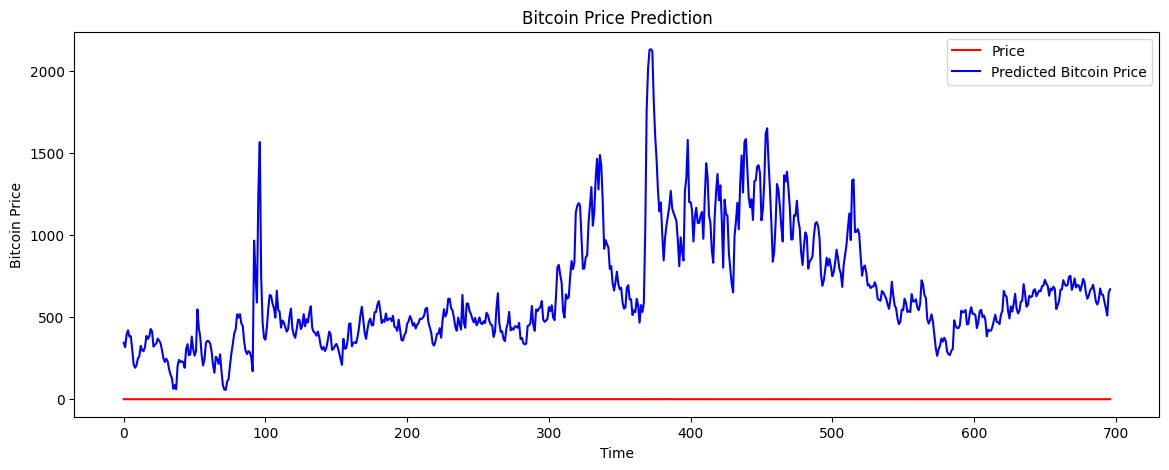

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Price')
plt.plot(predictions, color = 'blue', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

3024 757
Epoch 1/50
93/93 [==============================] - 16s 115ms/step - loss: 0.0112
Epoch 2/50
93/93 [==============================] - 11s 115ms/step - loss: 4.3599e-04
Epoch 3/50
93/93 [==============================] - 11s 115ms/step - loss: 3.4971e-04
Epoch 4/50
93/93 [==============================] - 11s 115ms/step - loss: 2.9818e-04
Epoch 5/50
93/93 [==============================] - 11s 114ms/step - loss: 2.7859e-04
Epoch 6/50
93/93 [==============================] - 11s 115ms/step - loss: 2.9135e-04
Epoch 7/50
93/93 [==============================] - 11s 116ms/step - loss: 2.8295e-04
Epoch 8/50
93/93 [==============================] - 11s 118ms/step - loss: 2.0058e-04
Epoch 9/50
93/93 [==============================] - 11s 121ms/step - loss: 2.5033e-04
Epoch 10/50
93/93 [==============================] - 11s 121ms/step - loss: 2.1922e-04
Epoch 11/50
93/93 [==============================] - 11s 118ms/step - loss: 2.7074e-04
Epoch 12/50
93/93 [============================

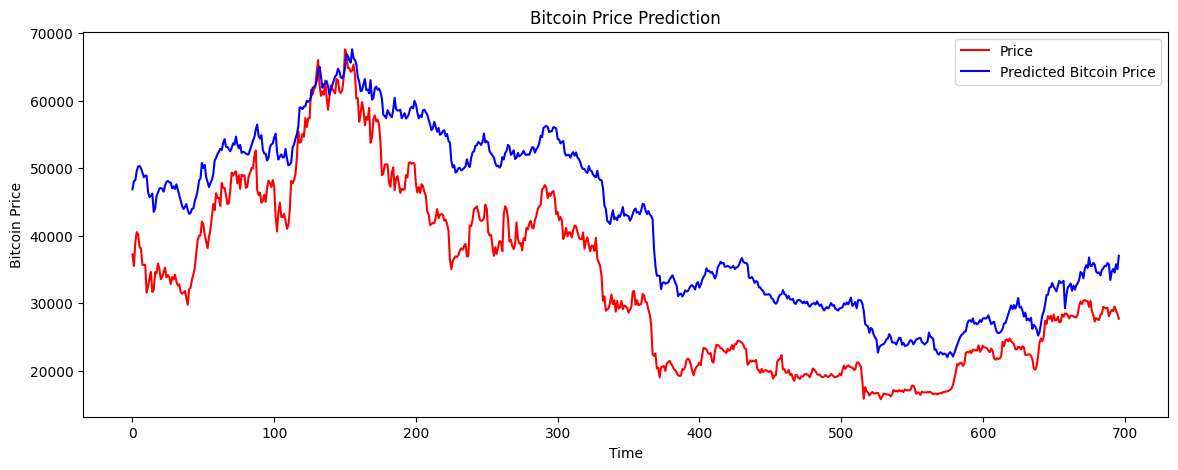

In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

# Read dataset
df = pd.read_csv('bitcoin-data.csv')

# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set timestamp as index
df = df.set_index('Timestamp')

# Prepare dataset
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train)

# Create training data set
train_data = scaled_data

# Split data into X_train and y_train
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i])
    y_train.append(train_data[i, 0])  # Here, 0 refers to the 'Price' column in the DataFrame

# Convert X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data into 3-D array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# Build LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(units=100, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=100, return_sequences=False)))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Test data set
test_data = scaler.transform(test)

# Create the x_test and y_test data sets
X_test = []
test = test.iloc[60:]
y_test = test['Price'].values
test.reset_index(inplace=True)

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, :])

# Convert x_test to a numpy array 
X_test = np.array(X_test)

# Reshape the data into 3-D array
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))  # reshape X_test according to your X_train

# Check the model's prediction
predictions = model.predict(X_test)

# Assuming 'Price' is the first column in your df DataFrame
price_scaler = MinMaxScaler(feature_range=(0,1))
price_scaler.min_, price_scaler.scale_ = scaler.min_[0], scaler.scale_[0]

# Now you can inverse_transform your predictions
predictions = price_scaler.inverse_transform(predictions)

# Calculate mean squared error
from sklearn.metrics import mean_squared_error
print('Test Mean Squared Error:', mean_squared_error(y_test, predictions))

predictions = predictions.flatten()  # this will convert it into (num_samples, )
# Calculate mean absolute percentage error
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('Test Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, predictions))

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Price')
plt.plot(predictions, color = 'blue', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()


2416 604
Epoch 1/50
74/74 [==============================] - 14s 109ms/step - loss: 0.0582
Epoch 2/50
74/74 [==============================] - 8s 108ms/step - loss: 0.0012
Epoch 3/50
74/74 [==============================] - 8s 108ms/step - loss: 7.4780e-04
Epoch 4/50
74/74 [==============================] - 8s 108ms/step - loss: 6.2021e-04
Epoch 5/50
74/74 [==============================] - 8s 109ms/step - loss: 5.8066e-04
Epoch 6/50
74/74 [==============================] - 8s 109ms/step - loss: 4.5023e-04
Epoch 7/50
74/74 [==============================] - 8s 110ms/step - loss: 3.9375e-04
Epoch 8/50
74/74 [==============================] - 8s 111ms/step - loss: 4.0726e-04
Epoch 9/50
74/74 [==============================] - 8s 109ms/step - loss: 3.9195e-04
Epoch 10/50
74/74 [==============================] - 8s 108ms/step - loss: 3.2757e-04
Epoch 11/50
74/74 [==============================] - 8s 109ms/step - loss: 3.0966e-04
Epoch 12/50
74/74 [==============================] - 8s 109ms

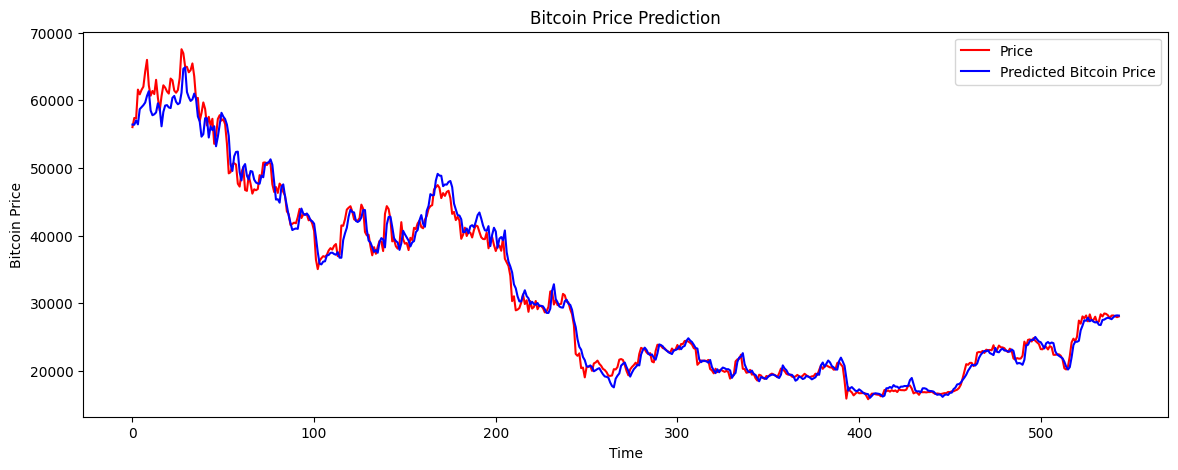

In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

# Read dataset
df = pd.read_csv('bitcoin-ta-2015.csv')

# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set timestamp as index
df = df.set_index('Timestamp')

# Prepare dataset
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train)

# Create training data set
train_data = scaled_data

# Split data into X_train and y_train
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i])
    y_train.append(train_data[i, 0])  # Here, 0 refers to the 'Price' column in the DataFrame

# Convert X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data into 3-D array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# Build LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(units=100, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=100, return_sequences=False)))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Test data set
test_data = scaler.transform(test)

# Create the x_test and y_test data sets
X_test = []
test = test.iloc[60:]
y_test = test['Close'].values
test.reset_index(inplace=True)

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, :])

# Convert x_test to a numpy array 
X_test = np.array(X_test)

# Reshape the data into 3-D array
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))  # reshape X_test according to your X_train

# Check the model's prediction
predictions = model.predict(X_test)

# Assuming 'Price' is the first column in your df DataFrame
price_scaler = MinMaxScaler(feature_range=(0,1))
price_scaler.min_, price_scaler.scale_ = scaler.min_[0], scaler.scale_[0]

# Now you can inverse_transform your predictions
predictions = price_scaler.inverse_transform(predictions)

# Calculate mean squared error
from sklearn.metrics import mean_squared_error
print('Test Mean Squared Error:', mean_squared_error(y_test, predictions))

predictions = predictions.flatten()  # this will convert it into (num_samples, )
# Calculate mean absolute percentage error
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('Test Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, predictions))

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Price')
plt.plot(predictions, color = 'blue', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

2500 625
Epoch 1/50
77/77 [==============================] - 15s 121ms/step - loss: 0.0031
Epoch 2/50
77/77 [==============================] - 9s 121ms/step - loss: 3.5058e-04
Epoch 3/50
77/77 [==============================] - 9s 120ms/step - loss: 2.6457e-04
Epoch 4/50
77/77 [==============================] - 9s 121ms/step - loss: 2.7515e-04
Epoch 5/50
77/77 [==============================] - 9s 120ms/step - loss: 2.4655e-04
Epoch 6/50
77/77 [==============================] - 9s 121ms/step - loss: 2.0779e-04
Epoch 7/50
77/77 [==============================] - 9s 121ms/step - loss: 2.2038e-04
Epoch 8/50
77/77 [==============================] - 9s 120ms/step - loss: 1.9854e-04
Epoch 9/50
77/77 [==============================] - 9s 122ms/step - loss: 1.3847e-04
Epoch 10/50
77/77 [==============================] - 9s 121ms/step - loss: 1.5295e-04
Epoch 11/50
77/77 [==============================] - 9s 120ms/step - loss: 1.7538e-04
Epoch 12/50
77/77 [==============================] - 9s 1

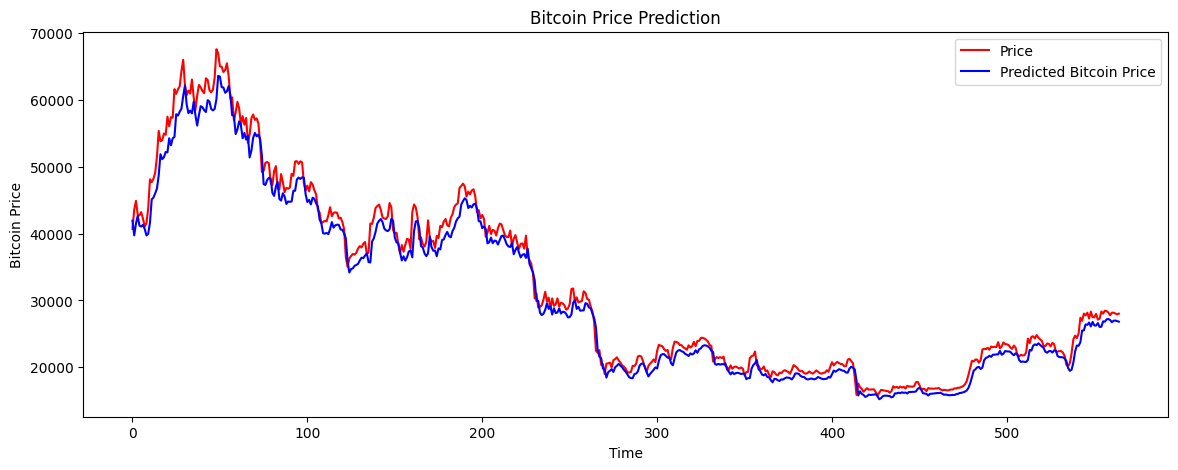

In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

# Read dataset
df = pd.read_csv('bitcoin-prices.csv')

# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set timestamp as index
df = df.set_index('Timestamp')

# Prepare dataset
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train)

# Create training data set
train_data = scaled_data

# Split data into X_train and y_train
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i])
    y_train.append(train_data[i, 0])  # Here, 0 refers to the 'Price' column in the DataFrame

# Convert X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data into 3-D array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# Build LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(units=100, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=100, return_sequences=False)))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Test data set
test_data = scaler.transform(test)

# Create the x_test and y_test data sets
X_test = []
test = test.iloc[60:]
y_test = test['Close'].values
test.reset_index(inplace=True)

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, :])

# Convert x_test to a numpy array 
X_test = np.array(X_test)

# Reshape the data into 3-D array
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))  # reshape X_test according to your X_train

# Check the model's prediction
predictions = model.predict(X_test)

# Assuming 'Price' is the first column in your df DataFrame
price_scaler = MinMaxScaler(feature_range=(0,1))
price_scaler.min_, price_scaler.scale_ = scaler.min_[0], scaler.scale_[0]

# Now you can inverse_transform your predictions
predictions = price_scaler.inverse_transform(predictions)

# Calculate mean squared error
from sklearn.metrics import mean_squared_error
print('Test Mean Squared Error:', mean_squared_error(y_test, predictions))

predictions = predictions.flatten()  # this will convert it into (num_samples, )
# Calculate mean absolute percentage error
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('Test Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, predictions))

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Price')
plt.plot(predictions, color = 'blue', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

2416 604
Epoch 1/100
15/15 [==============================] - 12s 433ms/step - loss: 0.1801 - val_loss: 0.3812
Epoch 2/100
15/15 [==============================] - 5s 368ms/step - loss: 0.0158 - val_loss: 0.1124
Epoch 3/100
15/15 [==============================] - 5s 357ms/step - loss: 0.0038 - val_loss: 0.0604
Epoch 4/100
15/15 [==============================] - 6s 369ms/step - loss: 0.0018 - val_loss: 0.0513
Epoch 5/100
15/15 [==============================] - 6s 391ms/step - loss: 9.1912e-04 - val_loss: 0.0365
Epoch 6/100
15/15 [==============================] - 6s 397ms/step - loss: 6.9295e-04 - val_loss: 0.0269
Epoch 7/100
15/15 [==============================] - 6s 399ms/step - loss: 5.8919e-04 - val_loss: 0.0231
Epoch 8/100
15/15 [==============================] - 6s 406ms/step - loss: 5.1938e-04 - val_loss: 0.0213
Epoch 9/100
15/15 [==============================] - 6s 392ms/step - loss: 5.1134e-04 - val_loss: 0.0210
Epoch 10/100
15/15 [==============================] - 6s 403m

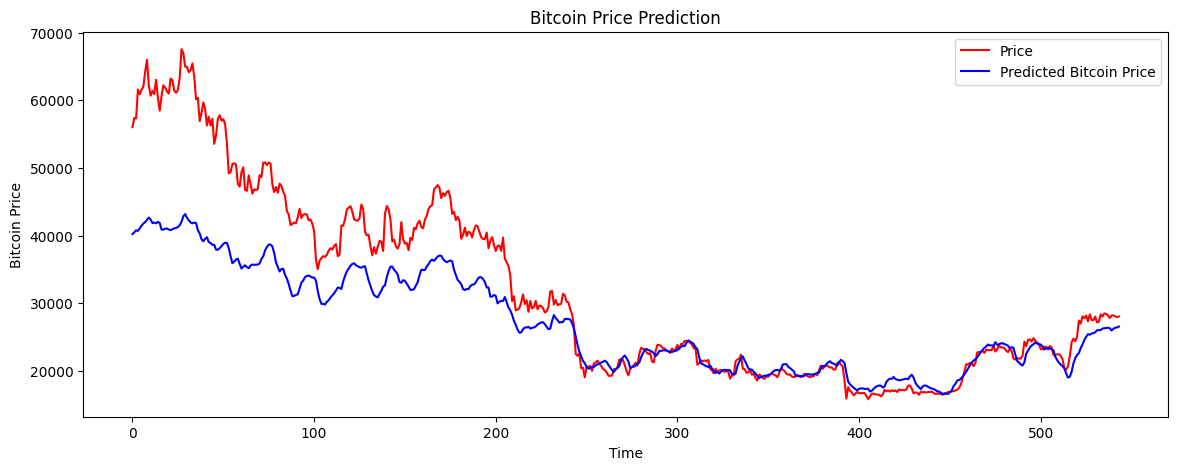

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

# Read dataset
df = pd.read_csv('bitcoin-ta-2015.csv')

# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set timestamp as index
df = df.set_index('Timestamp')

# Prepare dataset
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train)

# Create training data set
train_data = scaled_data

# Split data into X_train and y_train
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i])
    y_train.append(train_data[i, 0])  # Here, 0 refers to the 'Price' column in the DataFrame

# Convert X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data into 3-D array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# Build LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(units=100, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=100, return_sequences=False)))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)

# Test data set
test_data = scaler.transform(test)

# Create the x_test and y_test data sets
X_test = []
test = test.iloc[60:]
y_test = test['Close'].values
test.reset_index(inplace=True)

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, :])

# Convert x_test to a numpy array 
X_test = np.array(X_test)

# Reshape the data into 3-D array
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))  # reshape X_test according to your X_train

# Check the model's prediction
predictions = model.predict(X_test)

# Assuming 'Price' is the first column in your df DataFrame
price_scaler = MinMaxScaler(feature_range=(0,1))
price_scaler.min_, price_scaler.scale_ = scaler.min_[0], scaler.scale_[0]

# Now you can inverse_transform your predictions
predictions = price_scaler.inverse_transform(predictions)

# Calculate mean squared error
from sklearn.metrics import mean_squared_error
print('Test Mean Squared Error:', mean_squared_error(y_test, predictions))

predictions = predictions.flatten()  # this will convert it into (num_samples, )
# Calculate mean absolute percentage error
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('Test Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, predictions))

# Import the necessary metrics from sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Test Root Mean Squared Error:', rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print('Test Mean Absolute Error:', mae)

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print('Test R-squared:', r2)

# Calculate Adjusted R-squared
n = len(y_test)  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
print('Test Adjusted R-squared:', adjusted_r2)

# Calculate Mean Squared Logarithmic Error (MSLE)
# Ensure all values are positive before using MSLE
if np.all(predictions > 0) and np.all(y_test > 0):
    msle = mean_squared_log_error(y_test, predictions)
    print('Test Mean Squared Logarithmic Error:', msle)
else:
    print('Can\'t calculate Mean Squared Logarithmic Error: some predictions or true values are negative or zero')


    
# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Price')
plt.plot(predictions, color = 'blue', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.metrics import mean_squared_error

# Read dataset
df = pd.read_csv('bitcoin-ta-2015.csv')

# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set timestamp as index
df = df.set_index('Timestamp')

# Prepare dataset
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train)

# Create training data set
train_data = scaled_data

# Split data into X_train and y_train
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i])
    y_train.append(train_data[i, 0])

# Convert X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data into 3-D array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

def create_model(params):
    model = Sequential()
    model.add(Bidirectional(LSTM(units=int(params['units']), return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(params['dropout']))
    model.add(Bidirectional(LSTM(units=int(params['units']), return_sequences=False)))
    model.add(Dense(25))
    model.add(Dense(1))
    return model

def objective(params):
    model = create_model(params)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=params['learning_rate']), loss='mean_squared_error')

    # Train the model
    model.fit(params['X_train'], params['y_train'], epochs=int(params['epochs']), batch_size=int(params['batch_size']), validation_split=0.2, verbose=0)


    # Validation
    test_data = scaler.transform(params['test'])
    X_test = []
    y_test = []  # Initialize y_test as empty list

    for i in range(60, len(test_data)):
        X_test.append(test_data[i-60:i, :])  # Appending X_test
        y_test.append(params['test'].iloc[i]['Close'])  # Append corresponding y_test

    y_test = np.array(y_test)  # Convert y_test to numpy array


    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

    # Check the model's prediction
    predictions = model.predict(X_test)

    price_scaler = MinMaxScaler(feature_range=(0,1))
    price_scaler.min_, price_scaler.scale_ = scaler.min_[0], scaler.scale_[0]

    # Now you can inverse_transform your predictions
    predictions = price_scaler.inverse_transform(predictions)

    # Calculate mean squared error
    mse = mean_squared_error(y_test, predictions)

    return {'loss': mse, 'status': STATUS_OK}

# Hyperparameters space
space = {
    'units': hp.quniform('units', 50, 200, 1),
    'dropout': hp.uniform('dropout', 0.0, 0.5),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.0001), np.log(0.1)),
    'epochs': hp.quniform('epochs', 20, 50, 10),
    'batch_size': hp.quniform('batch_size', 10, 100, 1),
    'X_train': X_train,
    'y_train': y_train,
    'test': test
}

# Trials object to store the optimization history
trials = Trials()

# Run the algorithm
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print(best)



2416 604
17/17 [==============================] - 2s 54ms/step                                                                 

17/17 [==============================] - 2s 48ms/step                                                                 

17/17 [==============================] - 3s 93ms/step                                                                 

17/17 [==============================] - 2s 46ms/step                                                                 

  4%|█▊                                           | 4/100 [48:18<18:14:09, 683.84s/trial, best loss: 88457296.93802926]

2500 625
Epoch 1/100
16/16 [==============================] - 22s 982ms/step - loss: 0.0025 - val_loss: 0.0067 - lr: 0.0010
Epoch 2/100
16/16 [==============================] - 14s 871ms/step - loss: 3.8409e-04 - val_loss: 0.0031 - lr: 0.0010
Epoch 3/100
16/16 [==============================] - 14s 866ms/step - loss: 1.3405e-04 - val_loss: 0.0022 - lr: 0.0010
Epoch 4/100
16/16 [==============================] - 14s 894ms/step - loss: 7.2015e-05 - val_loss: 0.0013 - lr: 0.0010
Epoch 5/100
16/16 [==============================] - 14s 892ms/step - loss: 6.2283e-05 - val_loss: 0.0015 - lr: 0.0010
Epoch 6/100
16/16 [==============================] - 14s 890ms/step - loss: 5.6825e-05 - val_loss: 0.0014 - lr: 0.0010
Epoch 7/100
16/16 [==============================] - 14s 885ms/step - loss: 4.9965e-05 - val_loss: 0.0017 - lr: 0.0010
Epoch 8/100
16/16 [==============================] - 14s 881ms/step - loss: 4.8239e-05 - val_loss: 0.0018 - lr: 0.0010
Epoch 9/100
16/16 [========================

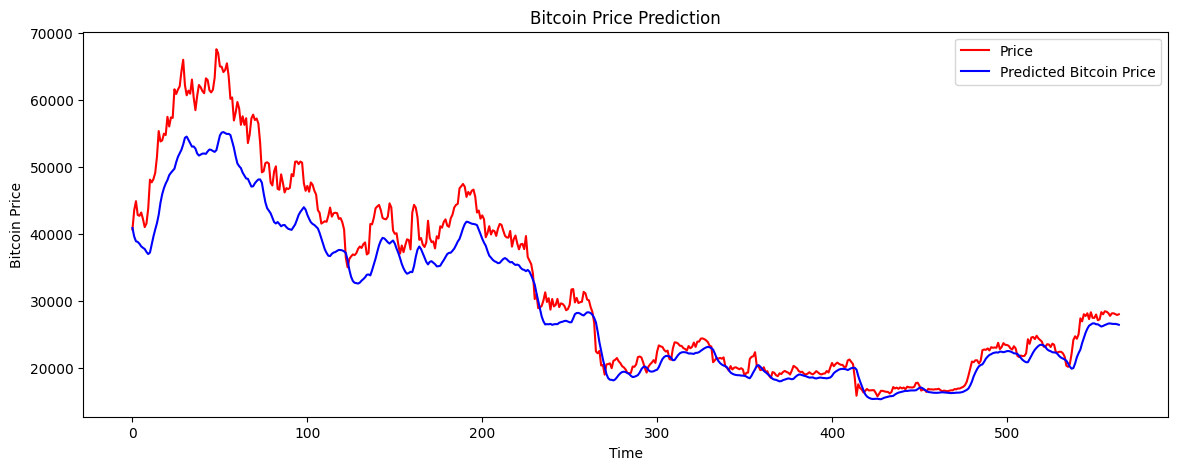

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

callback = LearningRateScheduler(scheduler)

# Read dataset
df = pd.read_csv('bitcoin-prices.csv')

# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set timestamp as index
df = df.set_index('Timestamp')

# Prepare dataset
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train)

# Create training data set
train_data = scaled_data

# Split data into X_train and y_train
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i])
    y_train.append(train_data[i, 0])  # Here, 0 refers to the 'Price' column in the DataFrame

# Convert X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data into 3-D array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# Build LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(units=100, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=100, return_sequences=False)))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2, callbacks=[callback])

# Test data set
test_data = scaler.transform(test)

# Create the x_test and y_test data sets
X_test = []
test = test.iloc[60:]
y_test = test['Close'].values
test.reset_index(inplace=True)

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, :])

# Convert x_test to a numpy array 
X_test = np.array(X_test)

# Reshape the data into 3-D array
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))  # reshape X_test according to your X_train

# Check the model's prediction
predictions = model.predict(X_test)

# Assuming 'Price' is the first column in your df DataFrame
price_scaler = MinMaxScaler(feature_range=(0,1))
price_scaler.min_, price_scaler.scale_ = scaler.min_[0], scaler.scale_[0]

# Now you can inverse_transform your predictions
predictions = price_scaler.inverse_transform(predictions)

# Calculate mean squared error
from sklearn.metrics import mean_squared_error
print('Test Mean Squared Error:', mean_squared_error(y_test, predictions))

predictions = predictions.flatten()  # this will convert it into (num_samples, )
# Calculate mean absolute percentage error
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('Test Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, predictions))

# Import the necessary metrics from sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Test Root Mean Squared Error:', rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print('Test Mean Absolute Error:', mae)

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print('Test R-squared:', r2)

# Calculate Adjusted R-squared
n = len(y_test)  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
print('Test Adjusted R-squared:', adjusted_r2)

# Calculate Mean Squared Logarithmic Error (MSLE)
# Ensure all values are positive before using MSLE
if np.all(predictions > 0) and np.all(y_test > 0):
    msle = mean_squared_log_error(y_test, predictions)
    print('Test Mean Squared Logarithmic Error:', msle)
else:
    print('Can\'t calculate Mean Squared Logarithmic Error: some predictions or true values are negative or zero')


    
# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Price')
plt.plot(predictions, color = 'blue', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

2500 625
Epoch 1/100
16/16 [==============================] - 23s 1s/step - loss: 0.0015 - val_loss: 0.0057 - lr: 0.0010
Epoch 2/100
16/16 [==============================] - 16s 969ms/step - loss: 1.8397e-04 - val_loss: 0.0049 - lr: 0.0010
Epoch 3/100
16/16 [==============================] - 16s 977ms/step - loss: 9.2992e-05 - val_loss: 0.0026 - lr: 0.0010
Epoch 4/100
16/16 [==============================] - 16s 977ms/step - loss: 6.6440e-05 - val_loss: 0.0018 - lr: 0.0010
Epoch 5/100
16/16 [==============================] - 16s 976ms/step - loss: 6.1084e-05 - val_loss: 0.0029 - lr: 0.0010
Epoch 6/100
16/16 [==============================] - 16s 991ms/step - loss: 5.5880e-05 - val_loss: 0.0027 - lr: 0.0010
Epoch 7/100
16/16 [==============================] - 15s 966ms/step - loss: 5.6150e-05 - val_loss: 0.0018 - lr: 0.0010
Epoch 8/100
16/16 [==============================] - 16s 1s/step - loss: 5.6501e-05 - val_loss: 0.0027 - lr: 0.0010
Epoch 9/100
16/16 [==============================

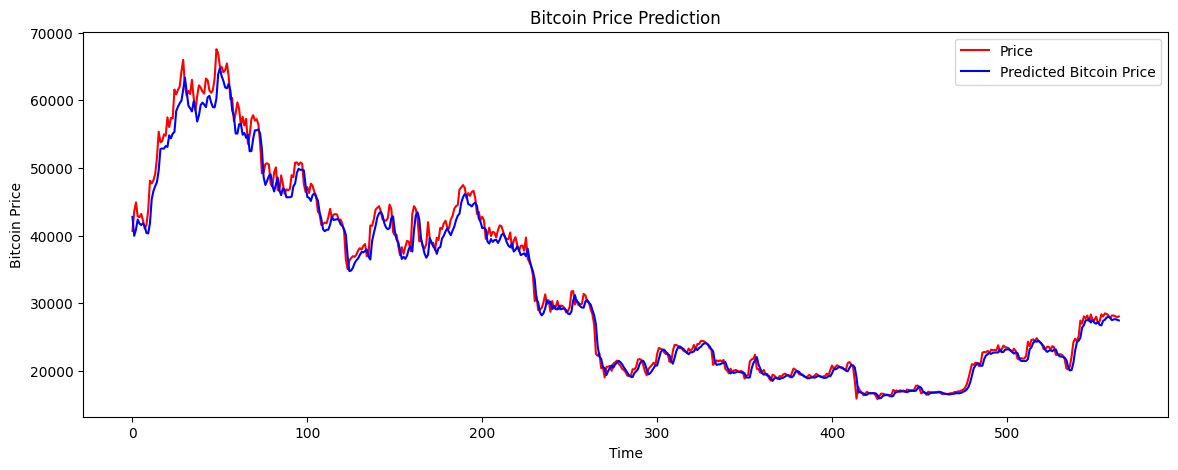

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.01)

callback = LearningRateScheduler(scheduler)

# Read dataset
df = pd.read_csv('bitcoin-prices.csv')

# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set timestamp as index
df = df.set_index('Timestamp')

# Prepare dataset
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train)

# Create training data set
train_data = scaled_data

# Split data into X_train and y_train
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i])
    y_train.append(train_data[i, 0])  # Here, 0 refers to the 'Price' column in the DataFrame

# Convert X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data into 3-D array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# Build LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(units=100, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=100, return_sequences=False)))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2, callbacks=[callback])

# Test data set
test_data = scaler.transform(test)

# Create the x_test and y_test data sets
X_test = []
test = test.iloc[60:]
y_test = test['Close'].values
test.reset_index(inplace=True)

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, :])

# Convert x_test to a numpy array 
X_test = np.array(X_test)

# Reshape the data into 3-D array
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))  # reshape X_test according to your X_train

# Check the model's prediction
predictions = model.predict(X_test)

# Assuming 'Price' is the first column in your df DataFrame
price_scaler = MinMaxScaler(feature_range=(0,1))
price_scaler.min_, price_scaler.scale_ = scaler.min_[0], scaler.scale_[0]

# Now you can inverse_transform your predictions
predictions = price_scaler.inverse_transform(predictions)

# Calculate mean squared error
from sklearn.metrics import mean_squared_error
print('Test Mean Squared Error:', mean_squared_error(y_test, predictions))

predictions = predictions.flatten()  # this will convert it into (num_samples, )
# Calculate mean absolute percentage error
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('Test Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, predictions))

# Import the necessary metrics from sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Test Root Mean Squared Error:', rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print('Test Mean Absolute Error:', mae)

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print('Test R-squared:', r2)

# Calculate Adjusted R-squared
n = len(y_test)  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
print('Test Adjusted R-squared:', adjusted_r2)

# Calculate Mean Squared Logarithmic Error (MSLE)
# Ensure all values are positive before using MSLE
if np.all(predictions > 0) and np.all(y_test > 0):
    msle = mean_squared_log_error(y_test, predictions)
    print('Test Mean Squared Logarithmic Error:', msle)
else:
    print('Can\'t calculate Mean Squared Logarithmic Error: some predictions or true values are negative or zero')


    
# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Price')
plt.plot(predictions, color = 'blue', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

2500 625
Epoch 1/100
61/61 [==============================] - 24s 300ms/step - loss: 6.1225e-04 - val_loss: 0.0020 - lr: 0.0010
Epoch 2/100
61/61 [==============================] - 17s 282ms/step - loss: 6.4976e-05 - val_loss: 0.0013 - lr: 0.0010
Epoch 3/100
61/61 [==============================] - 17s 287ms/step - loss: 4.8099e-05 - val_loss: 0.0033 - lr: 0.0010
Epoch 4/100
61/61 [==============================] - 17s 280ms/step - loss: 4.3057e-05 - val_loss: 0.0036 - lr: 0.0010
Epoch 5/100
61/61 [==============================] - 17s 280ms/step - loss: 3.8918e-05 - val_loss: 0.0030 - lr: 0.0010
Epoch 6/100
61/61 [==============================] - 17s 278ms/step - loss: 3.9010e-05 - val_loss: 0.0023 - lr: 0.0010
Epoch 7/100
61/61 [==============================] - 17s 279ms/step - loss: 3.1149e-05 - val_loss: 0.0034 - lr: 0.0010
Epoch 8/100
61/61 [==============================] - 17s 276ms/step - loss: 2.5639e-05 - val_loss: 0.0028 - lr: 0.0010
Epoch 9/100
61/61 [====================

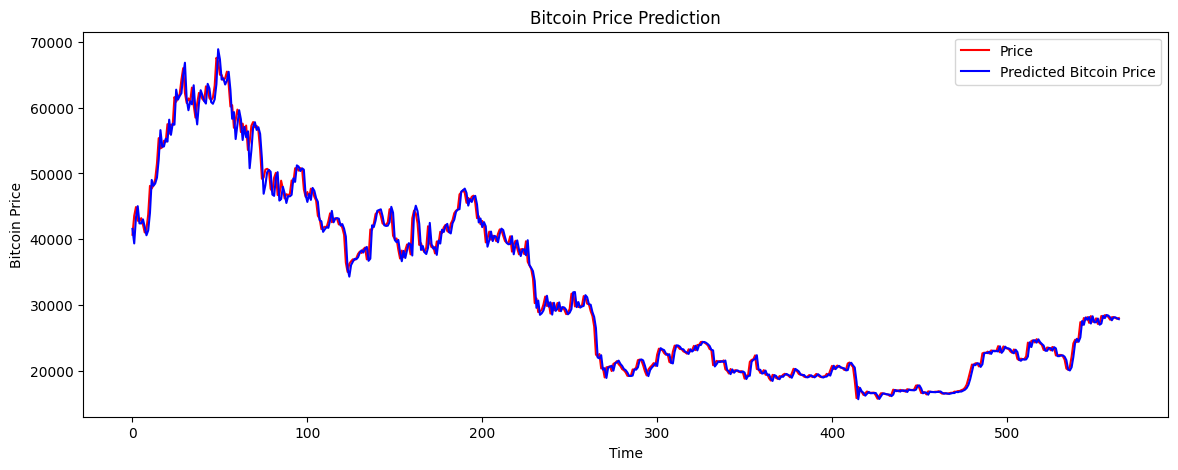

In [7]:
# Adjusting batch size: batch_size=32


import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.01)

callback = LearningRateScheduler(scheduler)

# Read dataset
df = pd.read_csv('bitcoin-prices.csv')

# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set timestamp as index
df = df.set_index('Timestamp')

# Prepare dataset
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train)

# Create training data set
train_data = scaled_data

# Split data into X_train and y_train
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i])
    y_train.append(train_data[i, 0])  # Here, 0 refers to the 'Price' column in the DataFrame

# Convert X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data into 3-D array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# Build LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(units=100, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=100, return_sequences=False)))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[callback])

# Test data set
test_data = scaler.transform(test)

# Create the x_test and y_test data sets
X_test = []
test = test.iloc[60:]
y_test = test['Close'].values
test.reset_index(inplace=True)

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, :])

# Convert x_test to a numpy array 
X_test = np.array(X_test)

# Reshape the data into 3-D array
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))  # reshape X_test according to your X_train

# Check the model's prediction
predictions = model.predict(X_test)

# Assuming 'Price' is the first column in your df DataFrame
price_scaler = MinMaxScaler(feature_range=(0,1))
price_scaler.min_, price_scaler.scale_ = scaler.min_[0], scaler.scale_[0]

# Now you can inverse_transform your predictions
predictions = price_scaler.inverse_transform(predictions)

# Calculate mean squared error
from sklearn.metrics import mean_squared_error
print('Test Mean Squared Error:', mean_squared_error(y_test, predictions))

predictions = predictions.flatten()  # this will convert it into (num_samples, )
# Calculate mean absolute percentage error
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('Test Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, predictions))

# Import the necessary metrics from sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Test Root Mean Squared Error:', rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print('Test Mean Absolute Error:', mae)

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print('Test R-squared:', r2)

# Calculate Adjusted R-squared
n = len(y_test)  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
print('Test Adjusted R-squared:', adjusted_r2)

# Calculate Mean Squared Logarithmic Error (MSLE)
# Ensure all values are positive before using MSLE
if np.all(predictions > 0) and np.all(y_test > 0):
    msle = mean_squared_log_error(y_test, predictions)
    print('Test Mean Squared Logarithmic Error:', msle)
else:
    print('Can\'t calculate Mean Squared Logarithmic Error: some predictions or true values are negative or zero')


    
# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Price')
plt.plot(predictions, color = 'blue', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

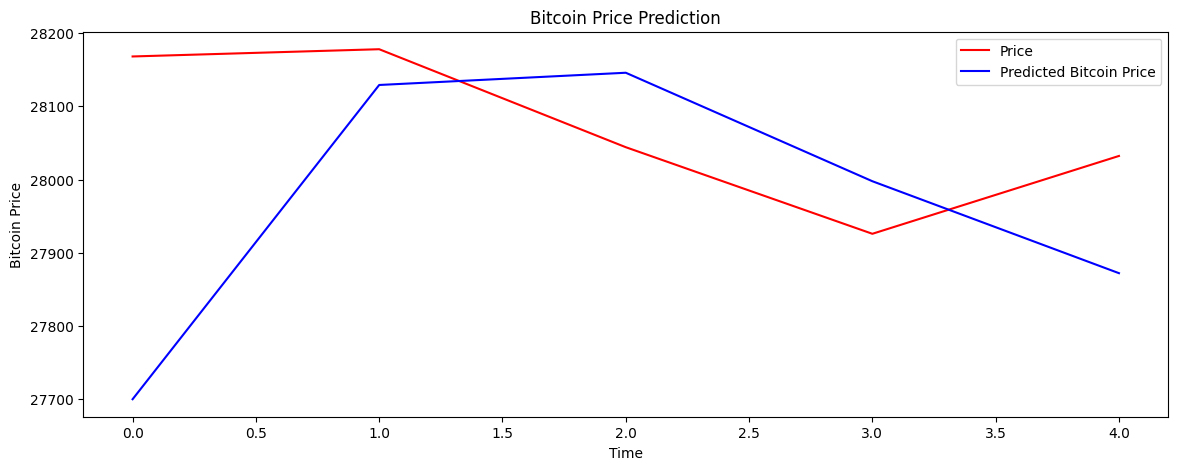

In [9]:
plt.figure(figsize=(14,5))
plt.plot(y_test[-5:], color = 'red', label = 'Price')
plt.plot(predictions[-5:], color = 'blue', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

2500 625
Epoch 1/10
61/61 [==============================] - 23s 295ms/step - loss: 0.0037 - val_loss: 0.0100 - lr: 0.0010
Epoch 2/10
61/61 [==============================] - 17s 275ms/step - loss: 3.8638e-04 - val_loss: 0.0057 - lr: 0.0010
Epoch 3/10
61/61 [==============================] - 17s 275ms/step - loss: 2.5488e-04 - val_loss: 0.0038 - lr: 0.0010
Epoch 4/10
61/61 [==============================] - 17s 275ms/step - loss: 1.9627e-04 - val_loss: 0.0028 - lr: 0.0010
Epoch 5/10
61/61 [==============================] - 17s 274ms/step - loss: 1.6349e-04 - val_loss: 0.0025 - lr: 0.0010
Epoch 6/10
61/61 [==============================] - 17s 276ms/step - loss: 1.5782e-04 - val_loss: 0.0025 - lr: 0.0010
Epoch 7/10
61/61 [==============================] - 17s 274ms/step - loss: 1.7472e-04 - val_loss: 0.0027 - lr: 0.0010
Epoch 8/10
61/61 [==============================] - 17s 275ms/step - loss: 1.5754e-04 - val_loss: 0.0024 - lr: 0.0010
Epoch 9/10
61/61 [==============================] -

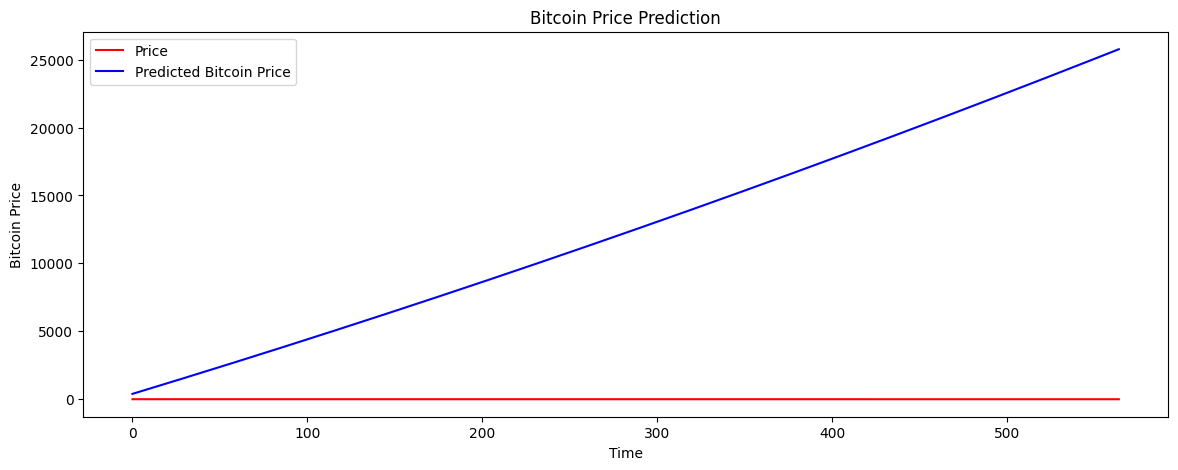

In [22]:
#The model is clearly overfitting
#try to use detrending as suggested here: https://stackoverflow.com/questions/54368686/lstm-having-a-systematic-offset-between-predictions-and-ground-truth

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.01)

callback = LearningRateScheduler(scheduler)

# Read dataset
df = pd.read_csv('bitcoin-prices.csv')

# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set timestamp as index
df = df.set_index('Timestamp')

# Prepare dataset
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

# Detrending
degree = 2
x = np.array(range(len(df)))
coefficients = np.polyfit(x[:len(train)], train['Close'], degree)
trend = np.polyval(coefficients, x)
detrended_df = df['Close'] - trend

# Split detrended data into train and test again
detrended_train, detrended_test = detrended_df.iloc[0:train_size], detrended_df.iloc[train_size:len(df)]

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(detrended_train.values.reshape(-1,1))

# Create training data set
train_data = scaled_data

# Split data into X_train and y_train
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i])
    y_train.append(train_data[i, 0])

# Convert X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data into 3-D array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(units=100, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=100, return_sequences=False)))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[callback])

# Test data set
scaled_test_data = scaler.transform(detrended_test.values.reshape(-1,1))

# Create the x_test and y_test data sets
X_test = []
y_test = []

for i in range(60, len(scaled_test_data)):
    X_test.append(scaled_test_data[i-60:i, :])
    y_test.append(scaled_test_data[i, 0]) # append corresponding y value

# Convert y_test and x_test to a numpy array 
y_test = np.array(y_test)
X_test = np.array(X_test)

# Reshape the data into 3-D array
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predict the prices with the model
raw_predictions = model.predict(X_test)

# We only keep the last prediction of each sequence
predictions = np.array([pred[-1] for pred in raw_predictions])

# We reshape to have a 2D array
predictions = predictions.reshape(-1,1)

# Inverse transform
predictions = scaler.inverse_transform(predictions)

# Add trend back to predictions
predictions = predictions + np.polyval(coefficients, range(len(train)+60, len(train) + len(predictions)+60))  # added 60 to account for the shift

# Flatten predictions
predictions = predictions.flatten()
predictions = predictions[-len(y_test):]

# Convert y_test back to its original scale and trend
y_test = y_test.reshape(-1,1)
y_test = scaler.inverse_transform(y_test)  # inverse transform
y_test = y_test + np.polyval(coefficients, range(len(train)+60, len(train) + len(y_test)+60))  # add trend back
y_test = y_test.flatten()  # flatten



def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('Test Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, predictions))

# Import the necessary metrics from sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Test Root Mean Squared Error:', rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print('Test Mean Absolute Error:', mae)

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print('Test R-squared:', r2)

# Calculate Adjusted R-squared
n = len(y_test)  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
print('Test Adjusted R-squared:', adjusted_r2)

# Calculate Mean Squared Logarithmic Error (MSLE)
# Ensure all values are positive before using MSLE
if np.all(predictions > 0) and np.all(y_test > 0):
    msle = mean_squared_log_error(y_test, predictions)
    print('Test Mean Squared Logarithmic Error:', msle)
else:
    print('Can\'t calculate Mean Squared Logarithmic Error: some predictions or true values are negative or zero')


    
# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Price')
plt.plot(predictions, color = 'blue', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

18/18 [==============================] - 1s 59ms/step
Test Mean Absolute Percentage Error: 22.13154696854964
Test Root Mean Squared Error: 2266.2481361493337
Test Mean Absolute Error: 2266.2481361493337
Test R-squared: 0.9047106821211208
Test Adjusted R-squared: 0.8933667157069686
Test Mean Squared Logarithmic Error: 0.16714376802658376


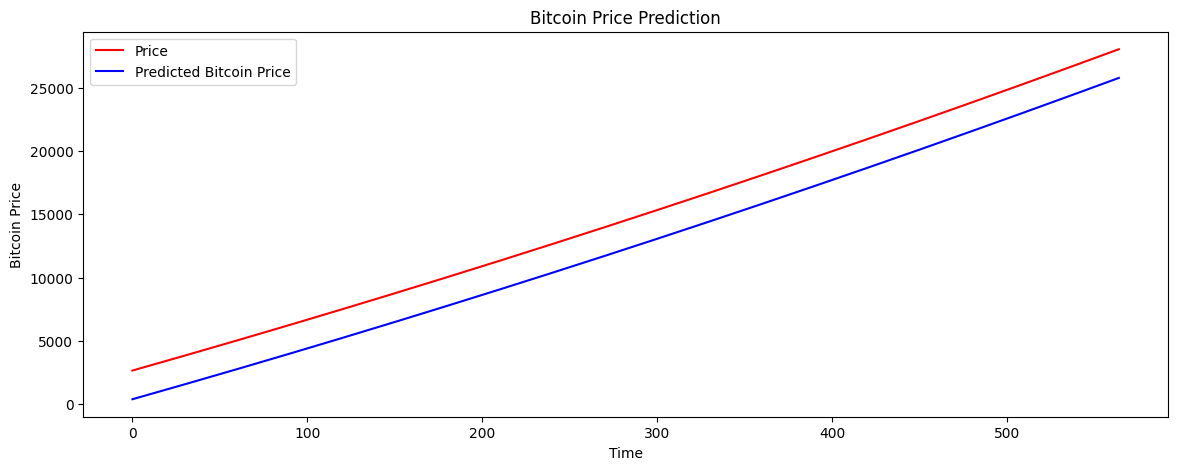

In [25]:
# Create the x_test and y_test data sets
X_test = []
y_test = []

for i in range(60, len(scaled_test_data)):
    X_test.append(scaled_test_data[i-60:i, :])
    y_test.append(scaled_test_data[i, 0]) # append corresponding y value

# Convert y_test and x_test to a numpy array 
y_test = np.array(y_test)
X_test = np.array(X_test)

# Reshape the data into 3-D array
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predict the prices with the model
raw_predictions = model.predict(X_test)

# We only keep the last prediction of each sequence
predictions = np.array([pred[-1] for pred in raw_predictions])

# We reshape to have a 2D array
predictions = predictions.reshape(-1,1)

# Inverse transform
predictions = scaler.inverse_transform(predictions)

# Add trend back to predictions
predictions = predictions + np.polyval(coefficients, range(len(train)+60, len(train) + len(predictions)+60))  # added 60 to account for the shift

# Flatten predictions
predictions = predictions.flatten()
predictions = predictions[-len(y_test):]

# Convert y_test back to its original scale and trend
y_test = y_test.reshape(-1,1)
y_test = scaler.inverse_transform(y_test)  # inverse transform
y_test = y_test + np.polyval(coefficients, range(len(train)+60, len(train) + len(y_test)+60))  # add trend back
y_test = y_test.flatten()  # flatten
y_test = y_test[-len(predictions):]  # slice y_test to have the same length as predictions

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('Test Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, predictions))

# Import the necessary metrics from sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Test Root Mean Squared Error:', rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print('Test Mean Absolute Error:', mae)

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print('Test R-squared:', r2)

# Calculate Adjusted R-squared
n = len(y_test)  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
print('Test Adjusted R-squared:', adjusted_r2)

# Calculate Mean Squared Logarithmic Error (MSLE)
# Ensure all values are positive before using MSLE
if np.all(predictions > 0) and np.all(y_test > 0):
    msle = mean_squared_log_error(y_test, predictions)
    print('Test Mean Squared Logarithmic Error:', msle)
else:
    print('Can\'t calculate Mean Squared Logarithmic Error: some predictions or true values are negative or zero')


    
# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Price')
plt.plot(predictions, color = 'blue', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

2416 604
Epoch 1/100
59/59 [==============================] - 13s 145ms/step - loss: 0.0130 - val_loss: 0.0388 - lr: 0.0010
Epoch 2/100
59/59 [==============================] - 7s 126ms/step - loss: 7.6629e-04 - val_loss: 0.0375 - lr: 0.0010
Epoch 3/100
59/59 [==============================] - 7s 126ms/step - loss: 6.4980e-04 - val_loss: 0.0386 - lr: 0.0010
Epoch 4/100
59/59 [==============================] - 7s 127ms/step - loss: 5.4559e-04 - val_loss: 0.0325 - lr: 0.0010
Epoch 5/100
59/59 [==============================] - 7s 127ms/step - loss: 4.6037e-04 - val_loss: 0.0334 - lr: 0.0010
Epoch 6/100
59/59 [==============================] - 7s 126ms/step - loss: 4.0157e-04 - val_loss: 0.0328 - lr: 0.0010
Epoch 7/100
59/59 [==============================] - 7s 127ms/step - loss: 4.0168e-04 - val_loss: 0.0453 - lr: 0.0010
Epoch 8/100
59/59 [==============================] - 7s 126ms/step - loss: 3.5609e-04 - val_loss: 0.0349 - lr: 0.0010
Epoch 9/100
59/59 [==============================]

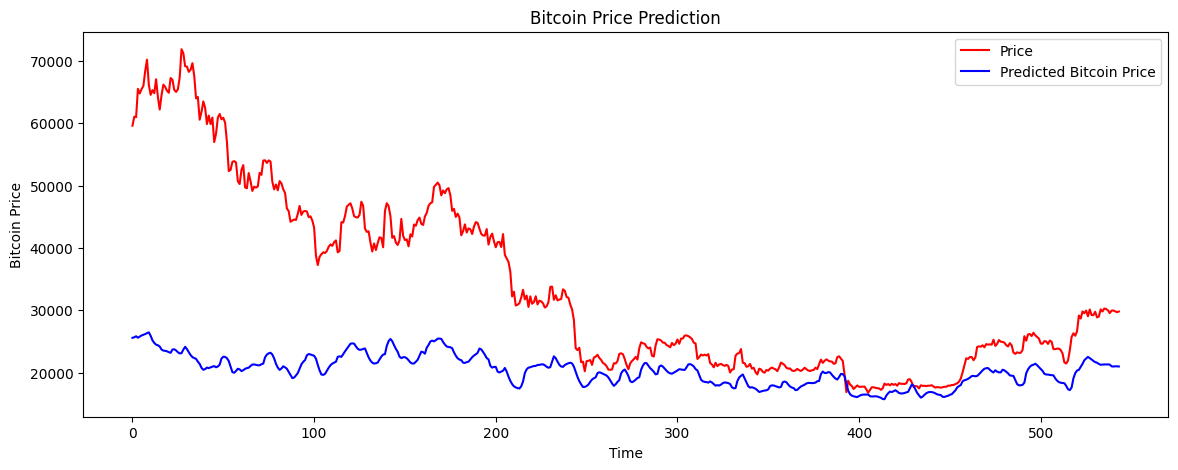

In [15]:
# Adjusting batch size: batch_size=32


import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.01)

callback = LearningRateScheduler(scheduler)

# Read dataset
df = pd.read_csv('bitcoin-ta-2015.csv')

# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set timestamp as index
df = df.set_index('Timestamp')

# Prepare dataset
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

actual_close_prices = df['Close'].values.reshape(-1, 1)
# Assuming 'Price' is the first column in your df DataFrame
price_scaler = MinMaxScaler()
price_scaler.fit(actual_close_prices)
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train)


# Create training data set
train_data = scaled_data

# Split data into X_train and y_train
X_train = []
y_train = []

# Assume `close_column` is the index of 'Close' in  DataFrame


for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i])
    y_train.append(train_data[i, 3])  # Here, 3 refers to the 'close' column in the DataFrame

# Convert X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data into 3-D array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# Build LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1:]), return_sequences=True))
model.add(Dropout(0.2))


model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.1))


model.add(LSTM(128))
model.add(Dropout(0.2))


model.add(Dense(32))
model.add(Dropout(0.2))

model.add(Dense(1))



# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[callback])

# Test data set
test_data = scaler.transform(test)

# Create the x_test and y_test data sets
X_test = []

y_test = test_data[60:, 3]
y_test = price_scaler.inverse_transform(y_test.reshape(-1,1))
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, :])

# Convert x_test to a numpy array 
X_test = np.array(X_test)

# Reshape the data into 3-D array
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))  # reshape X_test according to your X_train

# Check the model's prediction
predictions = model.predict(X_test)



# Now you can inverse_transform your predictions
predictions = price_scaler.inverse_transform(predictions)

# Calculate mean squared error
from sklearn.metrics import mean_squared_error
print('Test Mean Squared Error:', mean_squared_error(y_test, predictions))

predictions = predictions.flatten()  # this will convert it into (num_samples, )
# Calculate mean absolute percentage error
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('Test Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, predictions))

# Import the necessary metrics from sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Test Root Mean Squared Error:', rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print('Test Mean Absolute Error:', mae)

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print('Test R-squared:', r2)

# Calculate Adjusted R-squared
n = len(y_test)  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
print('Test Adjusted R-squared:', adjusted_r2)

# Calculate Mean Squared Logarithmic Error (MSLE)
# Ensure all values are positive before using MSLE
if np.all(predictions > 0) and np.all(y_test > 0):
    msle = mean_squared_log_error(y_test, predictions)
    print('Test Mean Squared Logarithmic Error:', msle)
else:
    print('Can\'t calculate Mean Squared Logarithmic Error: some predictions or true values are negative or zero')


    
# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Price')
plt.plot(predictions, color = 'blue', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

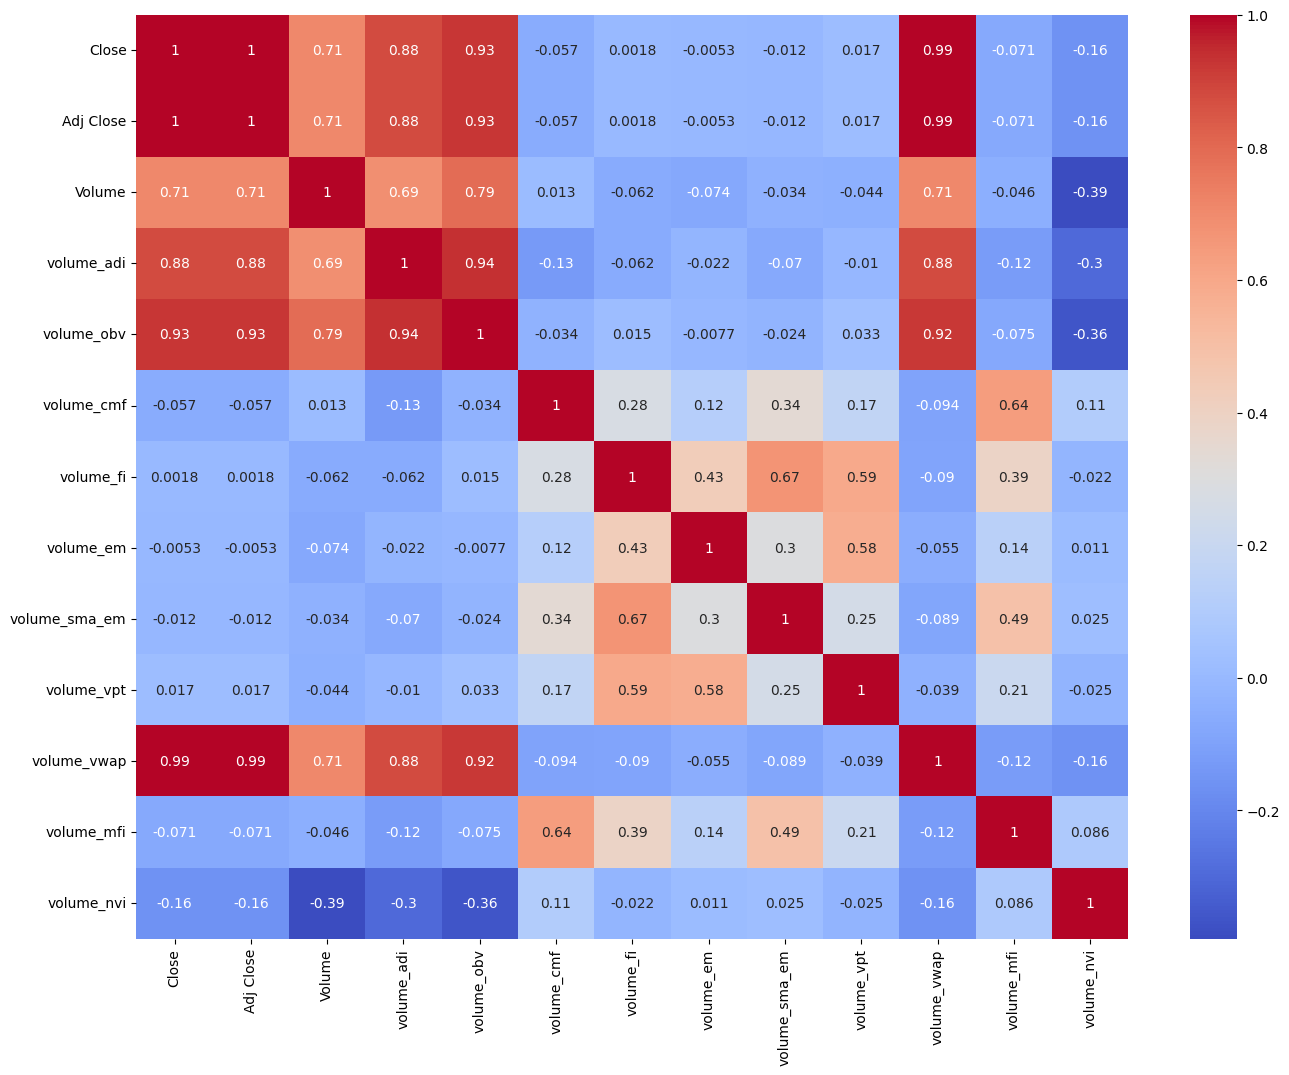

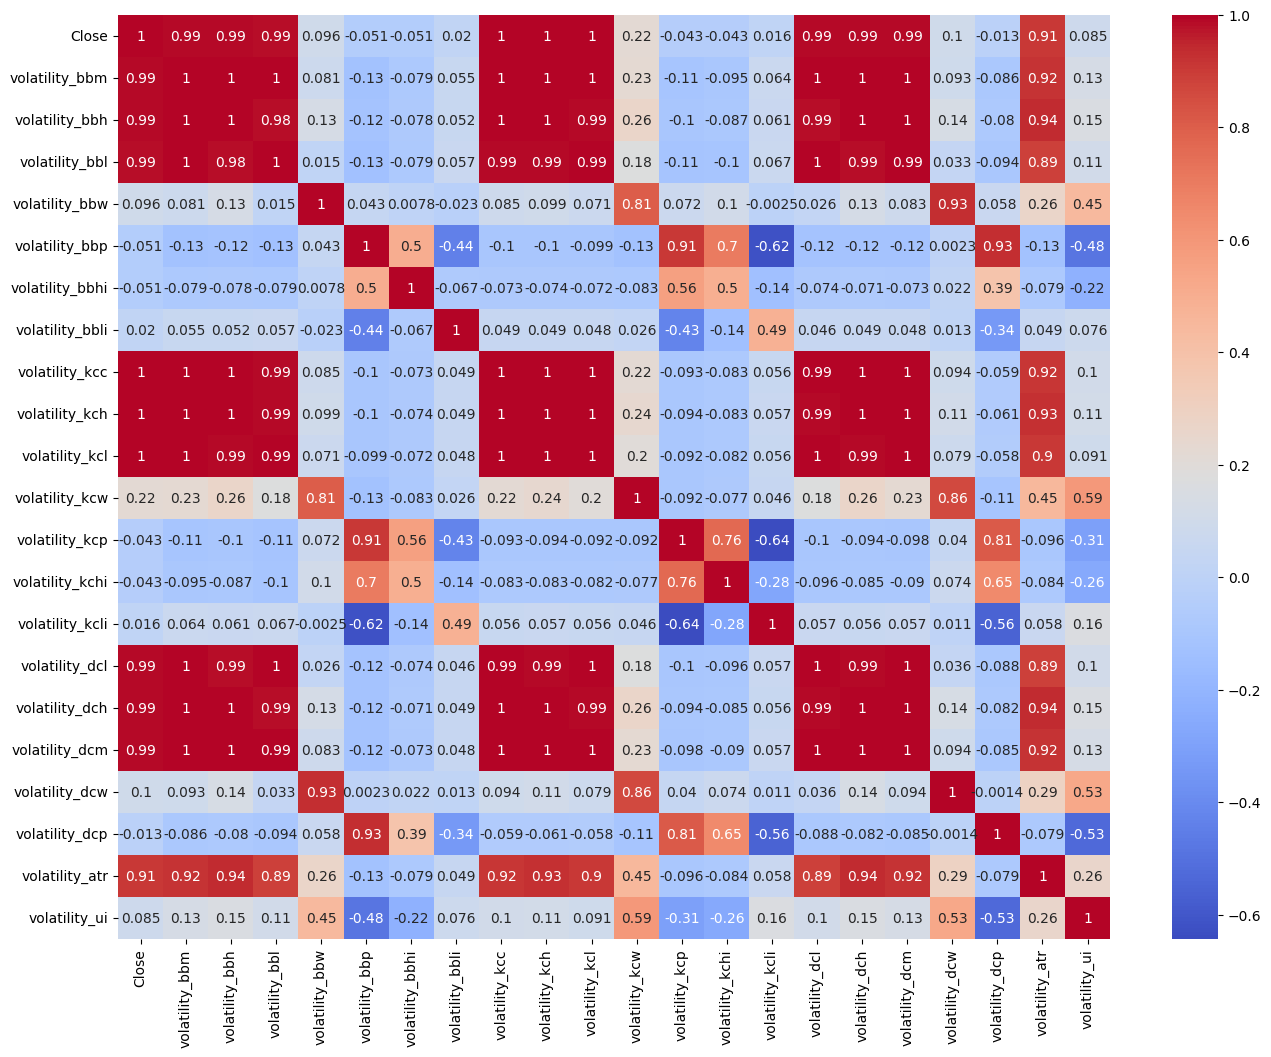

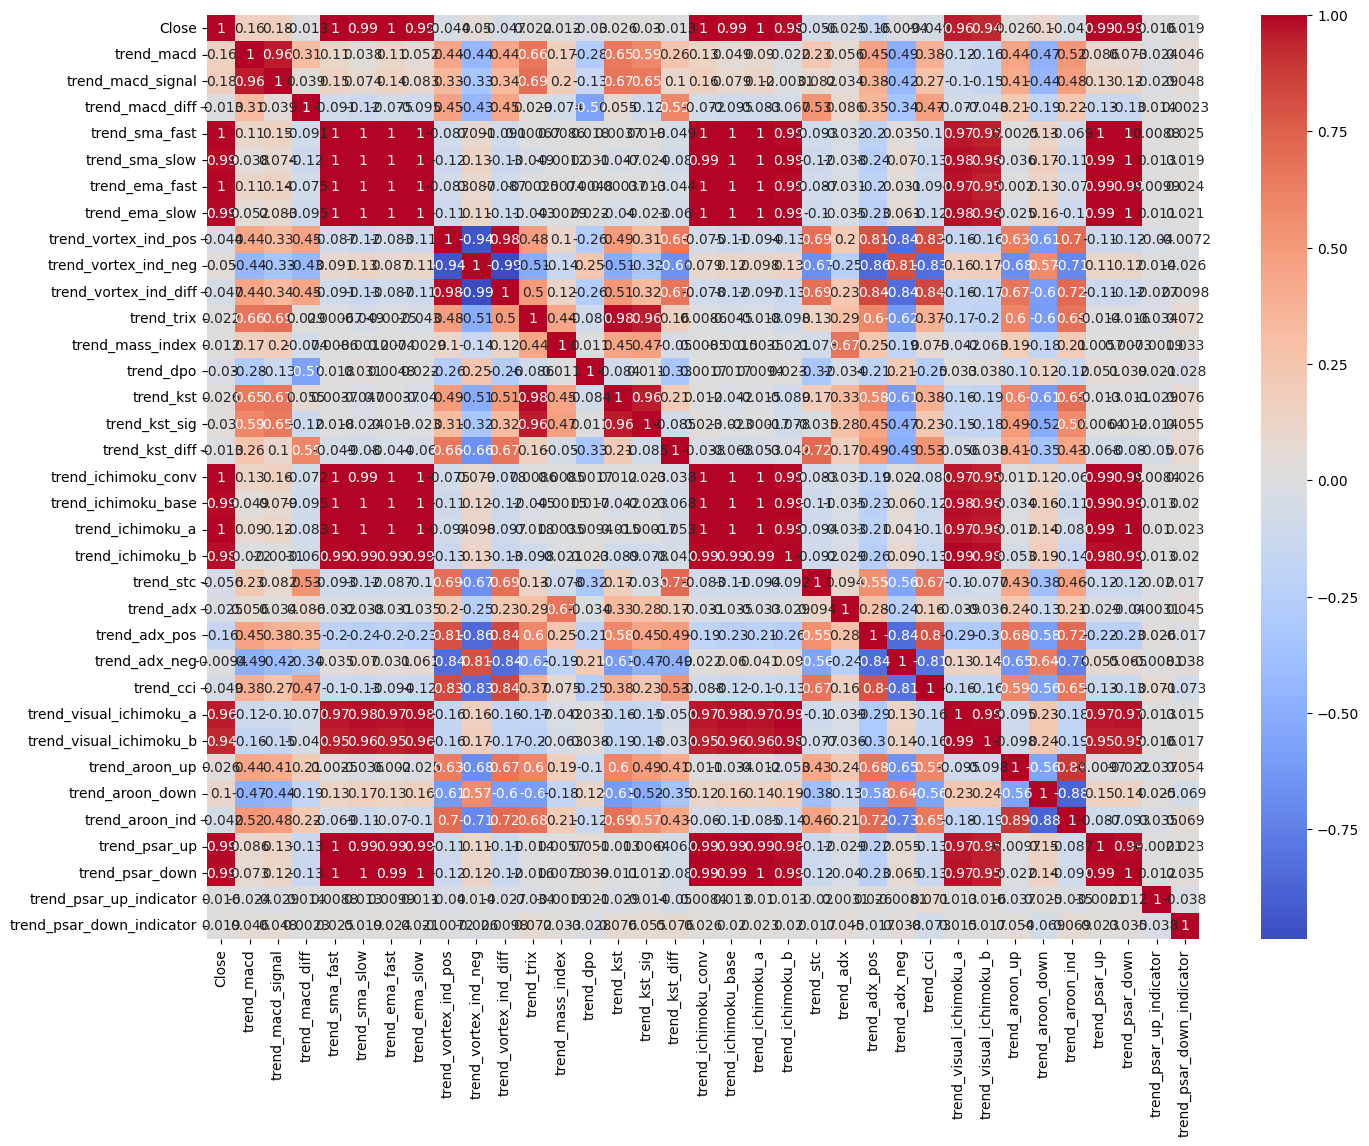

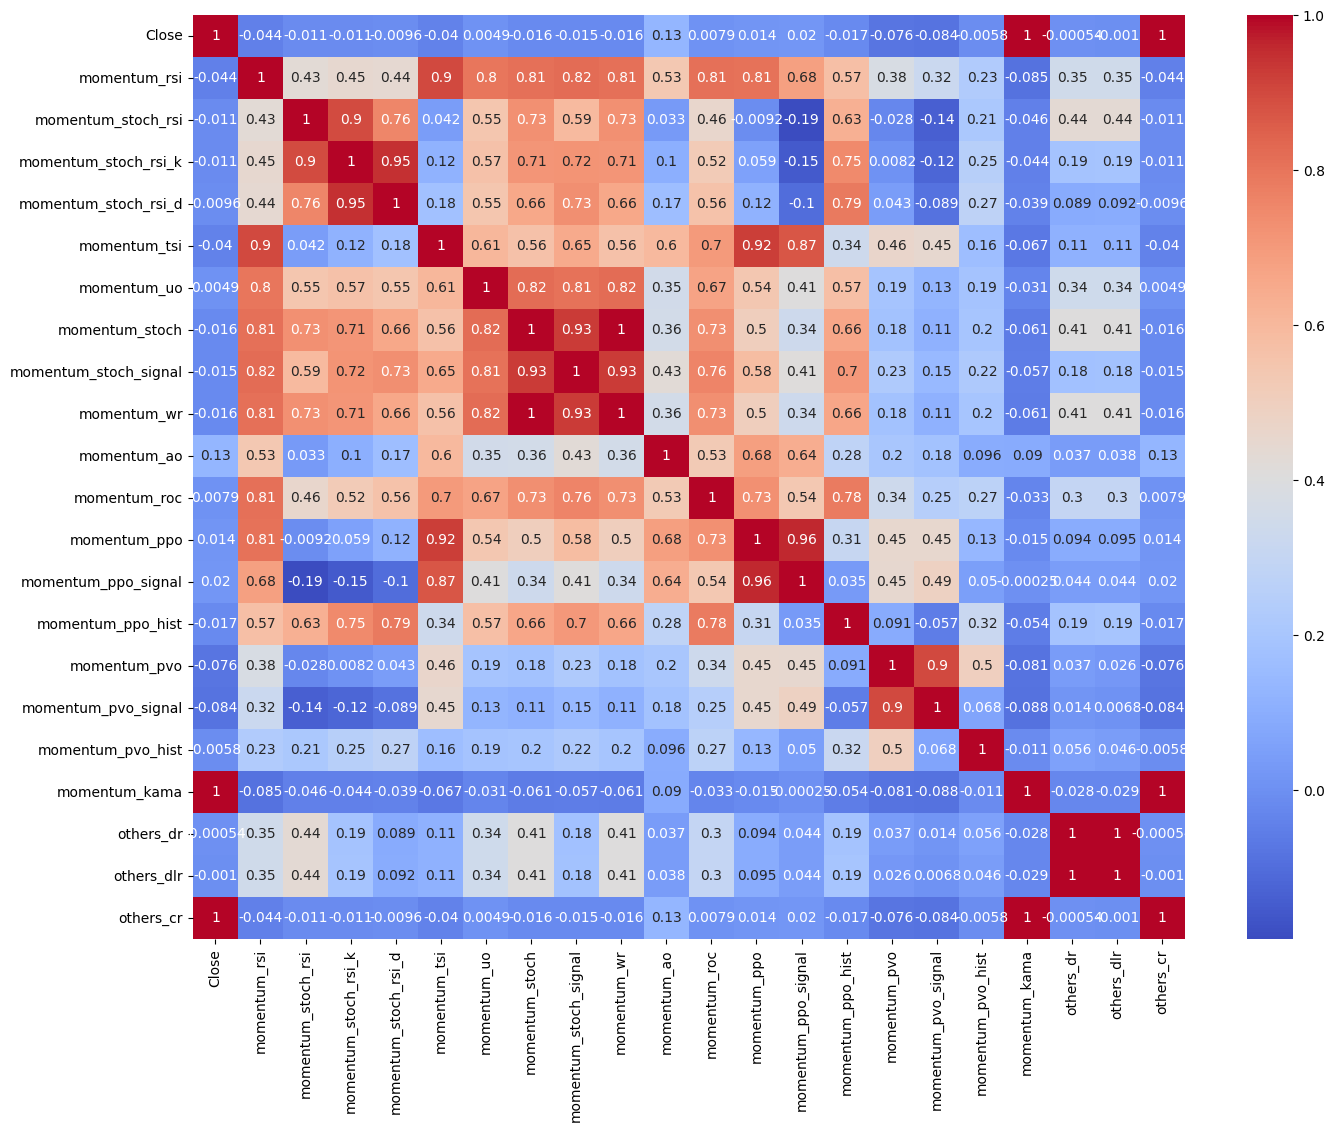

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
df = pd.read_csv('bitcoin-ta-2015.csv')

# Check the first few rows of the DataFrame
df.head()
# Convert 'Timestamp' column to DateTime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# Compute pairwise correlation of columns
volume_features=['Close','Adj Close','Volume','volume_adi','volume_obv','volume_cmf','volume_fi','volume_em','volume_sma_em','volume_vpt','volume_vwap','volume_mfi','volume_nvi']
volatility_features=['Close', 'volatility_bbm','volatility_bbh','volatility_bbl','volatility_bbw','volatility_bbp','volatility_bbhi','volatility_bbli','volatility_kcc','volatility_kch','volatility_kcl','volatility_kcw','volatility_kcp','volatility_kchi','volatility_kcli','volatility_dcl','volatility_dch','volatility_dcm','volatility_dcw','volatility_dcp','volatility_atr','volatility_ui']
trend_features=['Close','trend_macd','trend_macd_signal','trend_macd_diff','trend_sma_fast','trend_sma_slow','trend_ema_fast','trend_ema_slow','trend_vortex_ind_pos','trend_vortex_ind_neg','trend_vortex_ind_diff','trend_trix','trend_mass_index','trend_dpo','trend_kst','trend_kst_sig','trend_kst_diff','trend_ichimoku_conv','trend_ichimoku_base','trend_ichimoku_a','trend_ichimoku_b','trend_stc','trend_adx','trend_adx_pos','trend_adx_neg','trend_cci','trend_visual_ichimoku_a','trend_visual_ichimoku_b','trend_aroon_up','trend_aroon_down','trend_aroon_ind','trend_psar_up','trend_psar_down','trend_psar_up_indicator','trend_psar_down_indicator']
momentum_features=['Close','momentum_rsi','momentum_stoch_rsi','momentum_stoch_rsi_k','momentum_stoch_rsi_d','momentum_tsi','momentum_uo','momentum_stoch','momentum_stoch_signal','momentum_wr','momentum_ao','momentum_roc','momentum_ppo','momentum_ppo_signal','momentum_ppo_hist','momentum_pvo','momentum_pvo_signal','momentum_pvo_hist','momentum_kama','others_dr','others_dlr','others_cr']


volume_matrix = df[volume_features].corr()
# Use seaborn to visualize the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(volume_matrix, annot=True, cmap='coolwarm')
plt.show()

volatility_matrix = df[volatility_features].corr()
# Use seaborn to visualize the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(volatility_matrix, annot=True, cmap='coolwarm')
plt.show()

trend_matrix = df[trend_features].corr()
# Use seaborn to visualize the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(trend_matrix, annot=True, cmap='coolwarm')
plt.show()

momentum_matrix = df[momentum_features].corr()
# Use seaborn to visualize the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(momentum_matrix, annot=True, cmap='coolwarm')
plt.show()




Close            1.000000
Adj Close        1.000000
Volume           0.707462
volume_adi       0.876516
volume_obv       0.927839
volume_cmf       0.056916
volume_fi        0.001829
volume_em        0.005333
volume_sma_em    0.011792
volume_vpt       0.017429
volume_vwap      0.994721
volume_mfi       0.070531
volume_nvi       0.162089
Name: Close, dtype: float64


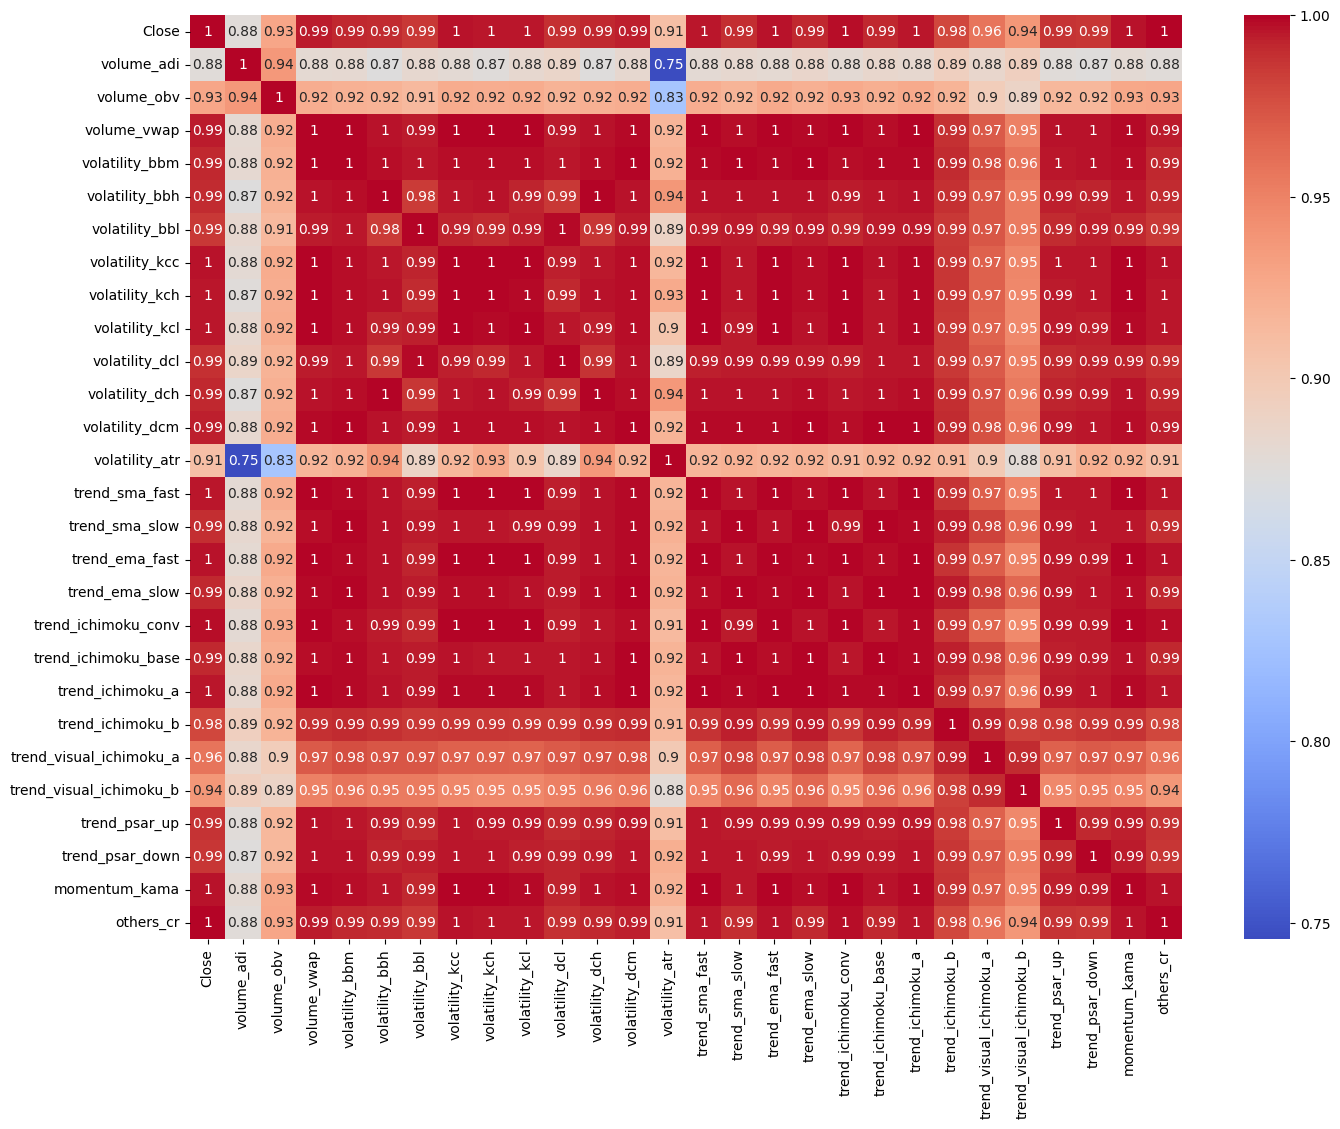

In [24]:
most_correlated=['Close', 'volume_adi', 'volume_obv', 'volume_vwap', 'volatility_bbm','volatility_bbh','volatility_bbl','volatility_kcc','volatility_kch','volatility_kcl','volatility_dcl','volatility_dch','volatility_dcm','volatility_atr','trend_sma_fast','trend_sma_slow','trend_ema_fast','trend_ema_slow','trend_ichimoku_conv','trend_ichimoku_base','trend_ichimoku_a','trend_ichimoku_b','trend_visual_ichimoku_a','trend_visual_ichimoku_b','trend_psar_up','trend_psar_down','momentum_kama','others_cr']
most_correlated_matrix = df[most_correlated].corr()
# Use seaborn to visualize the correlation matrix

correlations = correlation_matrix['Close'].apply(abs)
print(correlations)

plt.figure(figsize=(16, 12))
sns.heatmap(most_correlated_matrix, annot=True, cmap='coolwarm')
plt.show()

2500 625
Epoch 1/15
61/61 [==============================] - 12s 140ms/step - loss: 7.6756e-04 - val_loss: 0.0027
Epoch 2/15
61/61 [==============================] - 8s 125ms/step - loss: 3.1746e-04 - val_loss: 0.0035
Epoch 3/15
61/61 [==============================] - 8s 125ms/step - loss: 2.7401e-04 - val_loss: 0.0097
Epoch 4/15
61/61 [==============================] - 8s 124ms/step - loss: 2.1572e-04 - val_loss: 0.0045
Epoch 5/15
61/61 [==============================] - 8s 125ms/step - loss: 2.3440e-04 - val_loss: 0.0095
Epoch 6/15
61/61 [==============================] - 8s 125ms/step - loss: 2.0294e-04 - val_loss: 0.0083
Epoch 7/15
61/61 [==============================] - 8s 125ms/step - loss: 1.8425e-04 - val_loss: 0.0134
Epoch 8/15
61/61 [==============================] - 8s 124ms/step - loss: 1.9136e-04 - val_loss: 0.0109
Epoch 9/15
61/61 [==============================] - 8s 125ms/step - loss: 1.7219e-04 - val_loss: 0.0072
Epoch 10/15
61/61 [==============================] - 8

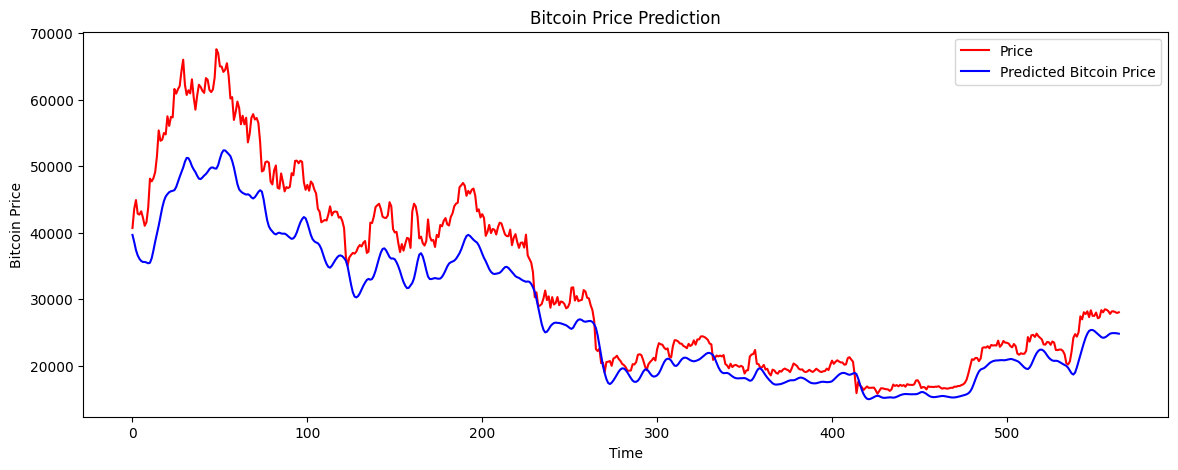

In [18]:
# Adjusting batch size: batch_size=32


import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.01)

callback = LearningRateScheduler(scheduler)

# Read dataset
df = pd.read_csv('bitcoin-prices.csv')

# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
most_correlated=['Close', 'volume_adi', 'volume_obv', 'volume_vwap', 'volatility_bbm','volatility_bbh','volatility_bbl','volatility_kcc','volatility_kch','volatility_kcl','volatility_dcl','volatility_dch','volatility_dcm','volatility_atr','trend_sma_fast','trend_sma_slow','trend_ema_fast','trend_ema_slow','trend_ichimoku_conv','trend_ichimoku_base','trend_ichimoku_a','trend_ichimoku_b','trend_visual_ichimoku_a','trend_visual_ichimoku_b','trend_psar_up','trend_psar_down','momentum_kama','others_cr']




# Set timestamp as index
df = df.set_index('Timestamp')

# Prepare dataset
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train)

# Create training data set
train_data = scaled_data

# Split data into X_train and y_train
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i])
    y_train.append(train_data[i, 0])  # Here, 0 refers to the 'Price' column in the DataFrame

# Convert X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data into 3-D array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# Build LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1:]), return_sequences=True))
model.add(Dropout(0.2))


model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.1))


model.add(LSTM(128))
model.add(Dropout(0.2))


model.add(Dense(32))
model.add(Dropout(0.2))

model.add(Dense(1))



# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

# Test data set
test_data = scaler.transform(test)

# Create the x_test and y_test data sets
X_test = []
test = test.iloc[60:]
y_test = test['Close'].values
test.reset_index(inplace=True)

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, :])

# Convert x_test to a numpy array 
X_test = np.array(X_test)

# Reshape the data into 3-D array
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))  # reshape X_test according to your X_train

# Check the model's prediction
predictions = model.predict(X_test)

# Assuming 'Price' is the first column in your df DataFrame
price_scaler = MinMaxScaler(feature_range=(0,1))
price_scaler.min_, price_scaler.scale_ = scaler.min_[0], scaler.scale_[0]

# Now you can inverse_transform your predictions
predictions = price_scaler.inverse_transform(predictions)

# Calculate mean squared error
from sklearn.metrics import mean_squared_error
print('Test Mean Squared Error:', mean_squared_error(y_test, predictions))

predictions = predictions.flatten()  # this will convert it into (num_samples, )
# Calculate mean absolute percentage error
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('Test Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, predictions))

# Import the necessary metrics from sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Test Root Mean Squared Error:', rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print('Test Mean Absolute Error:', mae)

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print('Test R-squared:', r2)

# Calculate Adjusted R-squared
n = len(y_test)  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
print('Test Adjusted R-squared:', adjusted_r2)

# Calculate Mean Squared Logarithmic Error (MSLE)
# Ensure all values are positive before using MSLE
if np.all(predictions > 0) and np.all(y_test > 0):
    msle = mean_squared_log_error(y_test, predictions)
    print('Test Mean Squared Logarithmic Error:', msle)
else:
    print('Can\'t calculate Mean Squared Logarithmic Error: some predictions or true values are negative or zero')


    
# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Price')
plt.plot(predictions, color = 'blue', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

                 Close    volume_adi  volume_obv  volume_vwap  volatility_bbm   
Timestamp                                                                       
2015-01-01  314.248993 -2.301323e+08  -109818882   321.525247      324.905199  \
2015-01-02  315.032013 -2.278507e+08  -101958232   322.118618      323.287999   
2015-01-03  281.082001 -2.609051e+08  -135012632   317.118471      319.760500   
2015-01-04  264.195007 -2.918056e+08  -190641732   306.218481      315.703000   
2015-01-05  274.473999 -2.734903e+08  -146678932   298.940495      313.073599   

            volatility_bbh  volatility_bbl  volatility_kcc  volatility_kch   
Timestamp                                                                    
2015-01-01      348.403326      301.407071      319.963334      329.525236  \
2015-01-02      344.740486      301.835513      318.095835      327.216636   
2015-01-03      344.378157      295.142842      314.718569      325.907769   
2015-01-04      347.746210      283.659790

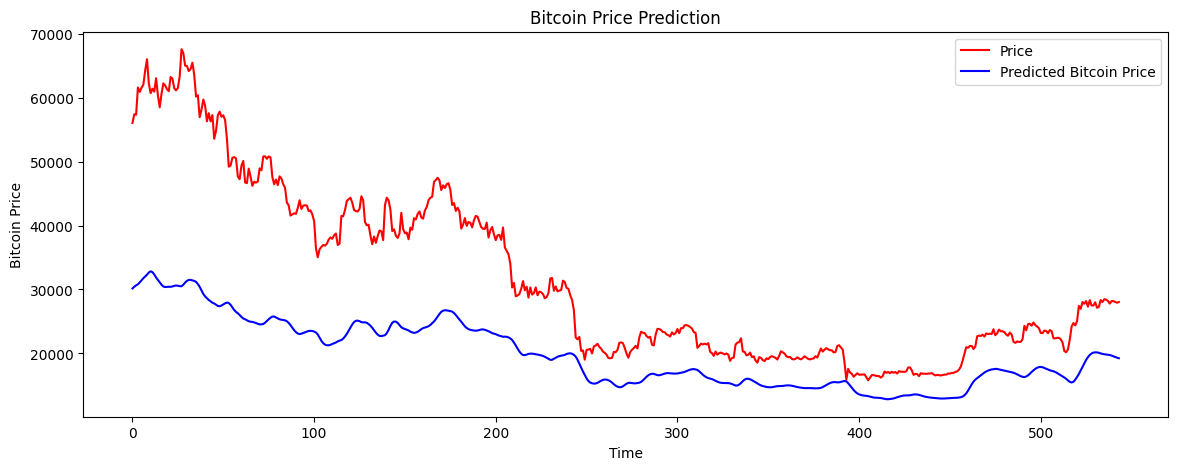

In [30]:
# Adjusting batch size: batch_size=32


import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.01)

callback = LearningRateScheduler(scheduler)

# Read dataset
df = pd.read_csv('bitcoin-ta-2015.csv')

# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set timestamp as index

most_correlated=['Timestamp', 'Close', 'volume_adi', 'volume_obv', 'volume_vwap', 'volatility_bbm','volatility_bbh','volatility_bbl','volatility_kcc','volatility_kch','volatility_kcl','volatility_dcl','volatility_dch','volatility_dcm','volatility_atr','trend_sma_fast','trend_sma_slow','trend_ema_fast','trend_ema_slow','trend_ichimoku_conv','trend_ichimoku_base','trend_ichimoku_a','trend_ichimoku_b','trend_visual_ichimoku_a','trend_visual_ichimoku_b','trend_psar_up','trend_psar_down','momentum_kama','others_cr']

df=df[most_correlated]
df = df.set_index('Timestamp')
print(df.head())
# Prepare dataset
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train)

# Create training data set
train_data = scaled_data

# Split data into X_train and y_train
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i])
    y_train.append(train_data[i, 0])  # Here, 0 refers to the 'Price' column in the DataFrame

# Convert X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data into 3-D array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# Build LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1:]), return_sequences=True))
model.add(Dropout(0.2))


model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))


model.add(LSTM(128))
model.add(Dropout(0.2))


model.add(Dense(32))
model.add(Dropout(0.2))

model.add(Dense(1))



# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

# Test data set
test_data = scaler.transform(test)

# Create the x_test and y_test data sets
X_test = []
test = test.iloc[60:]
y_test = test['Close'].values
test.reset_index(inplace=True)

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, :])

# Convert x_test to a numpy array 
X_test = np.array(X_test)

# Reshape the data into 3-D array
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))  # reshape X_test according to your X_train

# Check the model's prediction
predictions = model.predict(X_test)

# Assuming 'Price' is the first column in your df DataFrame
price_scaler = MinMaxScaler(feature_range=(0,1))
price_scaler.min_, price_scaler.scale_ = scaler.min_[0], scaler.scale_[0]

# Now you can inverse_transform your predictions
predictions = price_scaler.inverse_transform(predictions)

# Calculate mean squared error
from sklearn.metrics import mean_squared_error
print('Test Mean Squared Error:', mean_squared_error(y_test, predictions))

predictions = predictions.flatten()  # this will convert it into (num_samples, )
# Calculate mean absolute percentage error
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('Test Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, predictions))

# Import the necessary metrics from sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Test Root Mean Squared Error:', rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print('Test Mean Absolute Error:', mae)

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print('Test R-squared:', r2)

# Calculate Adjusted R-squared
n = len(y_test)  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
print('Test Adjusted R-squared:', adjusted_r2)

# Calculate Mean Squared Logarithmic Error (MSLE)
# Ensure all values are positive before using MSLE
if np.all(predictions > 0) and np.all(y_test > 0):
    msle = mean_squared_log_error(y_test, predictions)
    print('Test Mean Squared Logarithmic Error:', msle)
else:
    print('Can\'t calculate Mean Squared Logarithmic Error: some predictions or true values are negative or zero')


    
# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Price')
plt.plot(predictions, color = 'blue', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

In [ ]:
# Adjusting batch size: batch_size=32


import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.01)

callback = LearningRateScheduler(scheduler)

# Read dataset
df = pd.read_csv('bitcoin-ta-2015.csv')

# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set timestamp as index

most_correlated=['Timestamp', 'Close', 'volume_adi', 'volume_obv', 'volume_vwap', 'volatility_bbm','volatility_bbh','volatility_bbl','volatility_kcc','volatility_kch','volatility_kcl','volatility_dcl','volatility_dch','volatility_dcm','volatility_atr','trend_sma_fast','trend_sma_slow','trend_ema_fast','trend_ema_slow','trend_ichimoku_conv','trend_ichimoku_base','trend_ichimoku_a','trend_ichimoku_b','trend_visual_ichimoku_a','trend_visual_ichimoku_b','trend_psar_up','trend_psar_down','momentum_kama','others_cr']

df=df[most_correlated]
df = df.set_index('Timestamp')
print(df.head())
# Prepare dataset
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train)

# Create training data set
train_data = scaled_data

# Split data into X_train and y_train
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i])
    y_train.append(train_data[i, 0])  # Here, 0 refers to the 'Price' column in the DataFrame

# Convert X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data into 3-D array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# Build LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1:]), return_sequences=True))
model.add(Dropout(0.2))


model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))


model.add(LSTM(128))
model.add(Dropout(0.2))


model.add(Dense(32))
model.add(Dropout(0.2))

model.add(Dense(1))



# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

# Test data set
test_data = scaler.transform(test)

# Create the x_test and y_test data sets
X_test = []
test = test.iloc[60:]
y_test = test['Close'].values
test.reset_index(inplace=True)

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, :])

# Convert x_test to a numpy array 
X_test = np.array(X_test)

# Reshape the data into 3-D array
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))  # reshape X_test according to your X_train

# Check the model's prediction
predictions = model.predict(X_test)

# Assuming 'Price' is the first column in your df DataFrame
price_scaler = MinMaxScaler(feature_range=(0,1))
price_scaler.min_, price_scaler.scale_ = scaler.min_[0], scaler.scale_[0]

# Now you can inverse_transform your predictions
predictions = price_scaler.inverse_transform(predictions)

# Calculate mean squared error
from sklearn.metrics import mean_squared_error
print('Test Mean Squared Error:', mean_squared_error(y_test, predictions))

predictions = predictions.flatten()  # this will convert it into (num_samples, )
# Calculate mean absolute percentage error
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('Test Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, predictions))

# Import the necessary metrics from sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Test Root Mean Squared Error:', rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print('Test Mean Absolute Error:', mae)

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print('Test R-squared:', r2)

# Calculate Adjusted R-squared
n = len(y_test)  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
print('Test Adjusted R-squared:', adjusted_r2)

# Calculate Mean Squared Logarithmic Error (MSLE)
# Ensure all values are positive before using MSLE
if np.all(predictions > 0) and np.all(y_test > 0):
    msle = mean_squared_log_error(y_test, predictions)
    print('Test Mean Squared Logarithmic Error:', msle)
else:
    print('Can\'t calculate Mean Squared Logarithmic Error: some predictions or true values are negative or zero')


    
# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Price')
plt.plot(predictions, color = 'blue', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

                 Close    volume_adi  volume_obv  volume_vwap  volatility_bbm   
Timestamp                                                                       
2015-01-01  314.248993 -2.301323e+08  -109818882   321.525247      324.905199  \
2015-01-02  315.032013 -2.278507e+08  -101958232   322.118618      323.287999   
2015-01-03  281.082001 -2.609051e+08  -135012632   317.118471      319.760500   
2015-01-04  264.195007 -2.918056e+08  -190641732   306.218481      315.703000   
2015-01-05  274.473999 -2.734903e+08  -146678932   298.940495      313.073599   

            volatility_bbh  volatility_bbl  volatility_kcc  volatility_kch   
Timestamp                                                                    
2015-01-01      348.403326      301.407071      319.963334      329.525236  \
2015-01-02      344.740486      301.835513      318.095835      327.216636   
2015-01-03      344.378157      295.142842      314.718569      325.907769   
2015-01-04      347.746210      283.659790

2416 604
Epoch 1/15
59/59 [==============================] - 13s 152ms/step - loss: 0.0011 - val_loss: 0.0281
Epoch 2/15
59/59 [==============================] - 8s 135ms/step - loss: 4.2726e-04 - val_loss: 0.0397
Epoch 3/15
59/59 [==============================] - 8s 131ms/step - loss: 3.8384e-04 - val_loss: 0.0374
Epoch 4/15
59/59 [==============================] - 8s 131ms/step - loss: 3.5366e-04 - val_loss: 0.0384
Epoch 5/15
59/59 [==============================] - 8s 131ms/step - loss: 2.7212e-04 - val_loss: 0.0631
Epoch 6/15
59/59 [==============================] - 8s 131ms/step - loss: 3.1477e-04 - val_loss: 0.0420
Epoch 7/15
59/59 [==============================] - 8s 131ms/step - loss: 2.5290e-04 - val_loss: 0.0397
Epoch 8/15
59/59 [==============================] - 8s 131ms/step - loss: 2.1062e-04 - val_loss: 0.0509
Epoch 9/15
59/59 [==============================] - 8s 131ms/step - loss: 2.2327e-04 - val_loss: 0.0429
Epoch 10/15
59/59 [==============================] - 8s 13

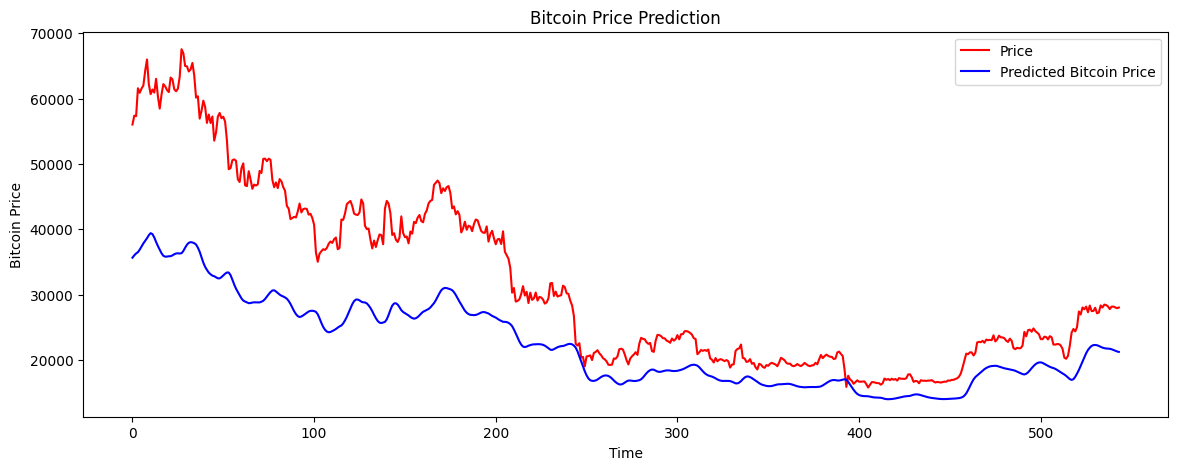

In [35]:
# Adjusting batch size: batch_size=32


import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.01)

callback = LearningRateScheduler(scheduler)

# Read dataset
df = pd.read_csv('bitcoin-ta-2015.csv')

# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Select most correlated features
most_correlated=['Timestamp', 'Close', 'volume_adi', 'volume_obv', 'volume_vwap', 'volatility_bbm','volatility_bbh','volatility_bbl','volatility_kcc','volatility_kch','volatility_kcl','volatility_dcl','volatility_dch','volatility_dcm','volatility_atr','trend_sma_fast','trend_sma_slow','trend_ema_fast','trend_ema_slow','trend_ichimoku_conv','trend_ichimoku_base','trend_ichimoku_a','trend_ichimoku_b','trend_visual_ichimoku_a','trend_visual_ichimoku_b','trend_psar_up','trend_psar_down','momentum_kama','others_cr']

df=df[most_correlated]

# Set timestamp as index
df = df.set_index('Timestamp')

# Prepare dataset
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train)

# Create training data set
train_data = scaled_data

# Split data into X_train and y_train
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i])
    y_train.append(train_data[i, 0])  # Here, 0 refers to the 'Price' column in the DataFrame

# Convert X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data into 3-D array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# Build LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1:]), return_sequences=True))
model.add(Dropout(0.2))


model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.1))


model.add(LSTM(128))
model.add(Dropout(0.2))


model.add(Dense(32))
model.add(Dropout(0.2))

model.add(Dense(1))



# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

# Test data set
test_data = scaler.transform(test)

# Create the x_test and y_test data sets
X_test = []
test = test.iloc[60:]
y_test = test['Close'].values
test.reset_index(inplace=True)

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, :])

# Convert x_test to a numpy array 
X_test = np.array(X_test)

# Reshape the data into 3-D array
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))  # reshape X_test according to your X_train

# Check the model's prediction
predictions = model.predict(X_test)

# Assuming 'Price' is the first column in your df DataFrame
price_scaler = MinMaxScaler(feature_range=(0,1))
price_scaler.min_, price_scaler.scale_ = scaler.min_[0], scaler.scale_[0]

# Now you can inverse_transform your predictions
predictions = price_scaler.inverse_transform(predictions)

# Calculate mean squared error
from sklearn.metrics import mean_squared_error
print('Test Mean Squared Error:', mean_squared_error(y_test, predictions))

predictions = predictions.flatten()  # this will convert it into (num_samples, )
# Calculate mean absolute percentage error
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('Test Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, predictions))

# Import the necessary metrics from sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Test Root Mean Squared Error:', rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print('Test Mean Absolute Error:', mae)

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print('Test R-squared:', r2)

# Calculate Adjusted R-squared
n = len(y_test)  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
print('Test Adjusted R-squared:', adjusted_r2)

# Calculate Mean Squared Logarithmic Error (MSLE)
# Ensure all values are positive before using MSLE
if np.all(predictions > 0) and np.all(y_test > 0):
    msle = mean_squared_log_error(y_test, predictions)
    print('Test Mean Squared Logarithmic Error:', msle)
else:
    print('Can\'t calculate Mean Squared Logarithmic Error: some predictions or true values are negative or zero')


    
# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Price')
plt.plot(predictions, color = 'blue', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

2416 604
Epoch 1/100
59/59 [==============================] - 20s 223ms/step - loss: 0.0024 - val_loss: 0.0322 - lr: 0.0010
Epoch 2/100
59/59 [==============================] - 12s 201ms/step - loss: 1.5077e-04 - val_loss: 0.0283 - lr: 0.0010
Epoch 3/100
59/59 [==============================] - 12s 202ms/step - loss: 1.3764e-04 - val_loss: 0.0352 - lr: 0.0010
Epoch 4/100
59/59 [==============================] - 12s 201ms/step - loss: 1.0472e-04 - val_loss: 0.0298 - lr: 0.0010
Epoch 5/100
59/59 [==============================] - 12s 201ms/step - loss: 9.0862e-05 - val_loss: 0.0266 - lr: 0.0010
Epoch 6/100
59/59 [==============================] - 12s 201ms/step - loss: 1.0101e-04 - val_loss: 0.0295 - lr: 0.0010
Epoch 7/100
59/59 [==============================] - 12s 201ms/step - loss: 9.1058e-05 - val_loss: 0.0295 - lr: 0.0010
Epoch 8/100
59/59 [==============================] - 12s 202ms/step - loss: 8.0889e-05 - val_loss: 0.0254 - lr: 0.0010
Epoch 9/100
59/59 [========================

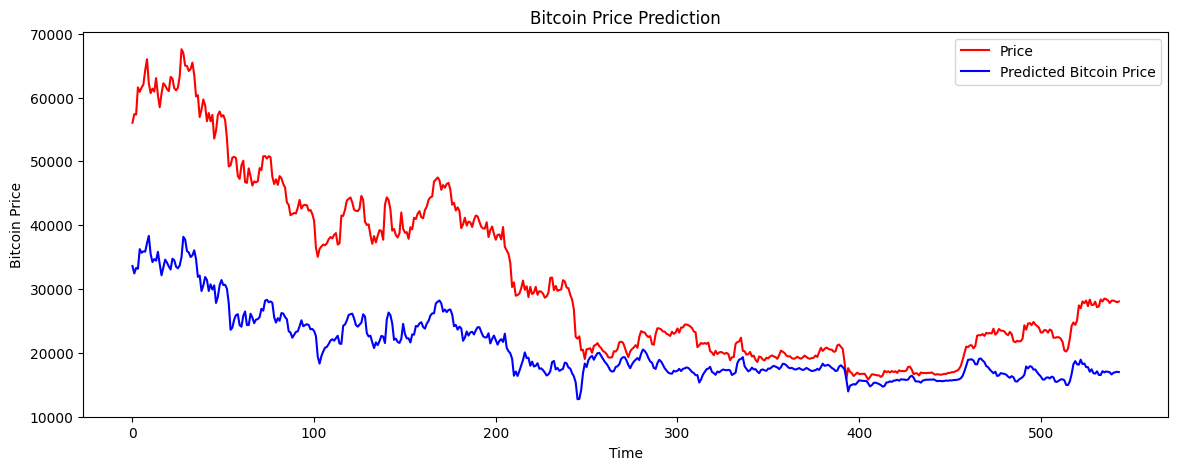

In [36]:
# Adjusting batch size: batch_size=32


import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.01)

callback = LearningRateScheduler(scheduler)

# Read dataset
df = pd.read_csv('bitcoin-ta-2015.csv')

# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Select most correlated features
most_correlated=['Timestamp', 'Close', 'volume_adi', 'volume_obv', 'volume_vwap', 'volatility_bbm','volatility_bbh','volatility_bbl','volatility_kcc','volatility_kch','volatility_kcl','volatility_dcl','volatility_dch','volatility_dcm','volatility_atr','trend_sma_fast','trend_sma_slow','trend_ema_fast','trend_ema_slow','trend_ichimoku_conv','trend_ichimoku_base','trend_ichimoku_a','trend_ichimoku_b','trend_visual_ichimoku_a','trend_visual_ichimoku_b','trend_psar_up','trend_psar_down','momentum_kama','others_cr']

df=df[most_correlated]

# Set timestamp as index
df = df.set_index('Timestamp')

# Prepare dataset
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train)

# Create training data set
train_data = scaled_data

# Split data into X_train and y_train
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i])
    y_train.append(train_data[i, 0])  # Here, 0 refers to the 'Price' column in the DataFrame

# Convert X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data into 3-D array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# Build LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(units=100, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=100, return_sequences=False)))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[callback])

# Test data set
test_data = scaler.transform(test)

# Create the x_test and y_test data sets
X_test = []
test = test.iloc[60:]
y_test = test['Close'].values
test.reset_index(inplace=True)

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, :])

# Convert x_test to a numpy array 
X_test = np.array(X_test)

# Reshape the data into 3-D array
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))  # reshape X_test according to your X_train

# Check the model's prediction
predictions = model.predict(X_test)

# Assuming 'Price' is the first column in your df DataFrame
price_scaler = MinMaxScaler(feature_range=(0,1))
price_scaler.min_, price_scaler.scale_ = scaler.min_[0], scaler.scale_[0]

# Now you can inverse_transform your predictions
predictions = price_scaler.inverse_transform(predictions)

# Calculate mean squared error
from sklearn.metrics import mean_squared_error
print('Test Mean Squared Error:', mean_squared_error(y_test, predictions))

predictions = predictions.flatten()  # this will convert it into (num_samples, )
# Calculate mean absolute percentage error
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('Test Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, predictions))

# Import the necessary metrics from sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Test Root Mean Squared Error:', rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print('Test Mean Absolute Error:', mae)

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print('Test R-squared:', r2)

# Calculate Adjusted R-squared
n = len(y_test)  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
print('Test Adjusted R-squared:', adjusted_r2)

# Calculate Mean Squared Logarithmic Error (MSLE)
# Ensure all values are positive before using MSLE
if np.all(predictions > 0) and np.all(y_test > 0):
    msle = mean_squared_log_error(y_test, predictions)
    print('Test Mean Squared Logarithmic Error:', msle)
else:
    print('Can\'t calculate Mean Squared Logarithmic Error: some predictions or true values are negative or zero')


    
# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Price')
plt.plot(predictions, color = 'blue', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()